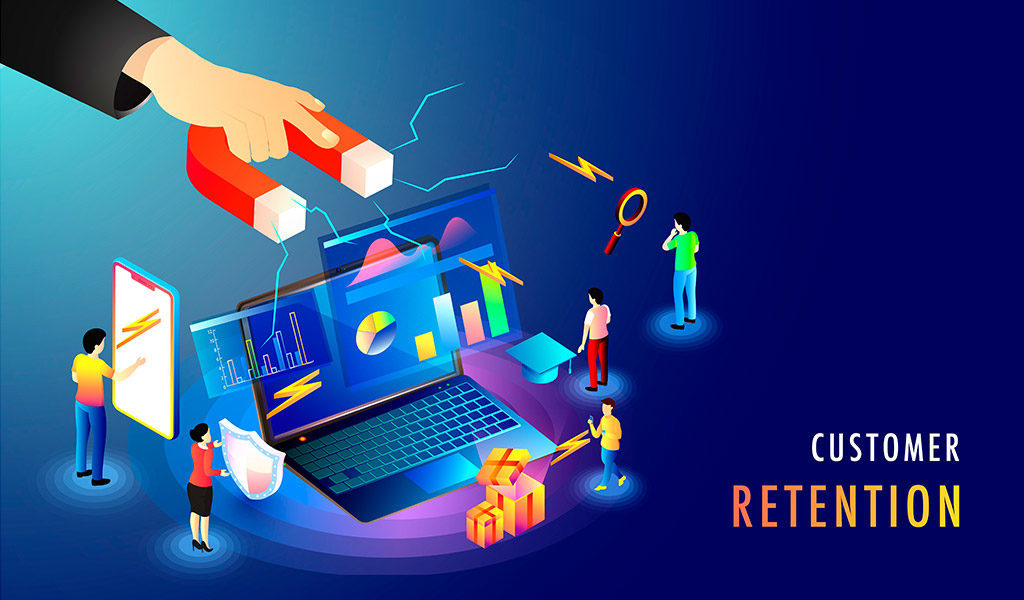

### Customer Retention Project


**E-retail factors for customer activation and retention: A case study from Indian e-commerce customers**

<font color='red'>Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.</font>

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
CR=pd.read_excel('customer_retention_dataset.xlsx')
CR

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

**Observations from the dataset**

<font color='red'>The dataset is the combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention of the customers.</font> 
    
<font color='red'>Utilitarian values: Utilitarian value is an objective value which provides some functional benefits to the consumers and helps consumers to accomplish practical tasks.</font>
    
<font color='red'>Hedonistic value: Hedonistic value is subjective (Psychological) value which provides an experiential satisfaction. In other words, the immediate psychological gratification that comes from experiencing some activity or from consumption of a product.</font>
    
<font color='red'>The dataset contains both numerical,categorical and alphanumerical data.</font>
    
<font color='red'>The dataset contains the details of all the customers who shop online frequently and their experience of buying products. From this details we need to find the success rate of online retailers.</font>

In [3]:
# To display all the rows in the dataset
pd.set_option("display.max_rows",None)

### Exploratory Data Analysis (EDA)

In [4]:
# Checking the dimension of dataset 
CR.shape

(269, 71)

<font color='red'>The dataset contains 269 rows and 71 columns.</font>

<font color='red'>By looking at the dataset we can find the columns have no proper names, so let's rename the names of the columns by appropriate new names.</font>

In [5]:
# Renaming the column names for better understanding
columns = ['Gender','Age','Shopping_City','Pincode','Shopping_Since','Shopping_Frequency','Internet_Accessibility','Device_Used',
           'Screen_Size','OS', 'Browser_Used','Channel_First_Used','Login_Mode','Time_Explored','Payment_Mode','Abandon_Frequency',
          'Abandon_Reason','Content_Readability','Similar_Product_Info','Seller_Product_Info','Product_Info_Clarity','Navigation_Ease',
          'Loading_Processing_Speed','User_Friendly_Interface','Convenient_Payment_Mode','Timely_Fulfilment_Trust','Customer_Support_Response',
          'Customer_Privacy_Guarantee','Various_Channel_Responses','Benefits','Enjoy','Convenience','Return_Replacement_Policy','Loyalty_Programs_Access',
          'Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Product_Several_Category','Relevant_Product_Info','Monetary_Savings',
          'Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Role_Fulfilment','Money_Worthy','Shopped_From','Easy_Web_App',
           'Visually_Appealing_WebApp','Product_Variety','Complete_Product_Info','Fast_WebApp','Reliable_WebApp','Quick_Purchase','Payment_Options_Availability',
           'Fast_Delivery','Customer_Privacy_Info','Financial_Security_Info','Perceived_Trustworthiness','Multichannel_Assistance','Long_Login_Time','Long_Display_Time',
           'Late_Price_Declare','Long_Loading_Time','Limited_Payment_Mode','Late_Delivery','WebApp_Design_Change','Page_Disruption','WebApp_Efficiency',
           'Recommendation']

CR.columns = columns

In [6]:
# Checking the new column names after renaming them
CR.columns

Index(['Gender', 'Age', 'Shopping_City', 'Pincode', 'Shopping_Since',
       'Shopping_Frequency', 'Internet_Accessibility', 'Device_Used',
       'Screen_Size', 'OS', 'Browser_Used', 'Channel_First_Used', 'Login_Mode',
       'Time_Explored', 'Payment_Mode', 'Abandon_Frequency', 'Abandon_Reason',
       'Content_Readability', 'Similar_Product_Info', 'Seller_Product_Info',
       'Product_Info_Clarity', 'Navigation_Ease', 'Loading_Processing_Speed',
       'User_Friendly_Interface', 'Convenient_Payment_Mode',
       'Timely_Fulfilment_Trust', 'Customer_Support_Response',
       'Customer_Privacy_Guarantee', 'Various_Channel_Responses', 'Benefits',
       'Enjoy', 'Convenience', 'Return_Replacement_Policy',
       'Loyalty_Programs_Access', 'Info_Satisfaction',
       'Site_Quality_Satisfaction', 'Net_Benefit_Satisfaction', 'Trust',
       'Product_Several_Category', 'Relevant_Product_Info', 'Monetary_Savings',
       'Patronizing_Convenience', 'Adventure_Sense', 'Social_Status',
      

<font color='red'>Now these are the assigned columns to the dataset</font>

In [7]:
CR.head()

Gender          Age  Shopping_City  Pincode Shopping_Since  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

   Shopping_Frequency Internet_Accessibility Device_Used Screen_Size  \
0         31-40 times                Dial-up     Desktop      Others   
1  41 times and above                  Wi-Fi  Smartphone  4.7 inches   
2  41 times and above        Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times        Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                  Wi-Fi  Smartphone  4.7 inches   

                      OS  ...          Long_Login_Time  \
0  Window/windows Mobile  ...                Amazon.in   
1                IOS/Mac  ...  Amazon.in, Flipkart.com   
2                Android  ...               Myntra.com   
3                IOS/Mac  ...             Snapdeal.com   
4                IOS/Mac  ...  Flipkart.com, Paytm.com   

          Long_Display_Time Late_Price_Declare Long_Loading_Time  \
0                 Amazon.in       Flipkart.com      Flipkart.com   
1                Myntra.com       snapdeal.com      Snapdeal.com   
2                Myntra.com         Myntra.com        Myntra.com   
3  Myntra.com, Snapdeal.com         Myntra.com         Paytm.com   
4                 Paytm.com          Paytm.com         Paytm.com   

  Limited_Payment_Mode Late_Delivery     WebApp_Design_Change  \
0            Amazon.in     Paytm.com             Flipkart.com   
1         Snapdeal.com  Snapdeal.com                Amazon.in   
2            Amazon.in     Paytm.com                Paytm.com   
3            Paytm.com     Paytm.com  Amazon.in, Flipkart.com   
4         Snapdeal.com     Paytm.com                Amazon.in   

           Page_Disruption                   WebApp_Efficiency  \
0                Amazon.in                           Amazon.in   
1               Myntra.com             Amazon.in, Flipkart.com   
2                Paytm.com                           Amazon.in   
3  Amazon.in, Flipkart.com  Amazon.in, Flipkart.com, Paytm.com   
4             Snapdeal.com                           Paytm.com   

                     Recommendation  
0                      Flipkart.com  
1             Amazon.in, Myntra.com  
2  Amazon.in, Paytm.com, Myntra.com  
3           Amazon.in, Flipkart.com  
4             Amazon.in, Myntra.com  

[5 rows x 71 columns]

In [8]:
# Checking the type of dataset
CR.dtypes

Gender                          object
Age                             object
Shopping_City                   object
Pincode                          int64
Shopping_Since                  object
Shopping_Frequency              object
Internet_Accessibility          object
Device_Used                     object
Screen_Size                     object
OS                              object
Browser_Used                    object
Channel_First_Used              object
Login_Mode                      object
Time_Explored                   object
Payment_Mode                    object
Abandon_Frequency               object
Abandon_Reason                  object
Content_Readability             object
Similar_Product_Info            object
Seller_Product_Info             object
Product_Info_Clarity            object
Navigation_Ease                 object
Loading_Processing_Speed        object
User_Friendly_Interface         object
Convenient_Payment_Mode         object
Timely_Fulfilment_Trust  

<font color='red'>All the columns in the dataset contains object type data except the column Pincode which has integer type data. So we need to encode the object data using appropriate encoding techniques, we will do that later.</font>

In [9]:
# To get good overview of the dataset
CR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        269 non-null    object
 1   Age                           269 non-null    object
 2   Shopping_City                 269 non-null    object
 3   Pincode                       269 non-null    int64 
 4   Shopping_Since                269 non-null    object
 5   Shopping_Frequency            269 non-null    object
 6   Internet_Accessibility        269 non-null    object
 7   Device_Used                   269 non-null    object
 8   Screen_Size                   269 non-null    object
 9   OS                            269 non-null    object
 10  Browser_Used                  269 non-null    object
 11  Channel_First_Used            269 non-null    object
 12  Login_Mode                    269 non-null    object
 13  Time_Explored       

<font color='red'>This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.</font>

<font color='red'>Since counts of all the columns are same, which means there are no null values present in the dataset.</font>

In [10]:
# Checking number of unique values in each column
CR.nunique().to_frame("No of Unique Values")

No of Unique Values
Gender                                          2
Age                                             5
Shopping_City                                  11
Pincode                                        39
Shopping_Since                                  5
Shopping_Frequency                              6
Internet_Accessibility                          4
Device_Used                                     4
Screen_Size                                     4
OS                                              3
Browser_Used                                    4
Channel_First_Used                              3
Login_Mode                                      5
Time_Explored                                   5
Payment_Mode                                    3
Abandon_Frequency                               4
Abandon_Reason                                  5
Content_Readability                             4
Similar_Product_Info                            4
Seller_Product_Info                             5
Product_Info_Clarity                            4
Navigation_Ease                                 4
Loading_Processing_Speed                        5
User_Friendly_Interface                         5
Convenient_Payment_Mode                         3
Timely_Fulfilment_Trust                         4
Customer_Support_Response                       4
Customer_Privacy_Guarantee                      3
Various_Channel_Responses                       4
Benefits                                        5
Enjoy                                           5
Convenience                                     4
Return_Replacement_Policy                       3
Loyalty_Programs_Access                         5
Info_Satisfaction                               3
Site_Quality_Satisfaction                       3
Net_Benefit_Satisfaction                        4
Trust                                           5
Product_Several_Category                        4
Relevant_Product_Info                           4
Monetary_Savings                                4
Patronizing_Convenience                         3
Adventure_Sense                                 5
Social_Status                                   5
Gratification                                   5
Role_Fulfilment                                 5
Money_Worthy                                    3
Shopped_From                                    9
Easy_Web_App                                   10
Visually_Appealing_WebApp                      10
Product_Variety                                 9
Complete_Product_Info                          11
Fast_WebApp                                    10
Reliable_WebApp                                10
Quick_Purchase                                  9
Payment_Options_Availability                   11
Fast_Delivery                                   6
Customer_Privacy_Info                          11
Financial_Security_Info                        11
Perceived_Trustworthiness                       9
Multichannel_Assistance                        10
Long_Login_Time                                10
Long_Display_Time                              10
Late_Price_Declare                              8
Long_Loading_Time                              11
Limited_Payment_Mode                            8
Late_Delivery                                   6
WebApp_Design_Change                            7
Page_Disruption                                 8
WebApp_Efficiency                               8
Recommendation                                  8

<font color='red'>These are the number of unique values present in each columns.</font>

In [11]:
# Checking null values in the dataframe
CR.isnull().sum()

Gender                          0
Age                             0
Shopping_City                   0
Pincode                         0
Shopping_Since                  0
Shopping_Frequency              0
Internet_Accessibility          0
Device_Used                     0
Screen_Size                     0
OS                              0
Browser_Used                    0
Channel_First_Used              0
Login_Mode                      0
Time_Explored                   0
Payment_Mode                    0
Abandon_Frequency               0
Abandon_Reason                  0
Content_Readability             0
Similar_Product_Info            0
Seller_Product_Info             0
Product_Info_Clarity            0
Navigation_Ease                 0
Loading_Processing_Speed        0
User_Friendly_Interface         0
Convenient_Payment_Mode         0
Timely_Fulfilment_Trust         0
Customer_Support_Response       0
Customer_Privacy_Guarantee      0
Various_Channel_Responses       0
Benefits      

<font color='red'>We see that we don't have any null values in the dataset</font>

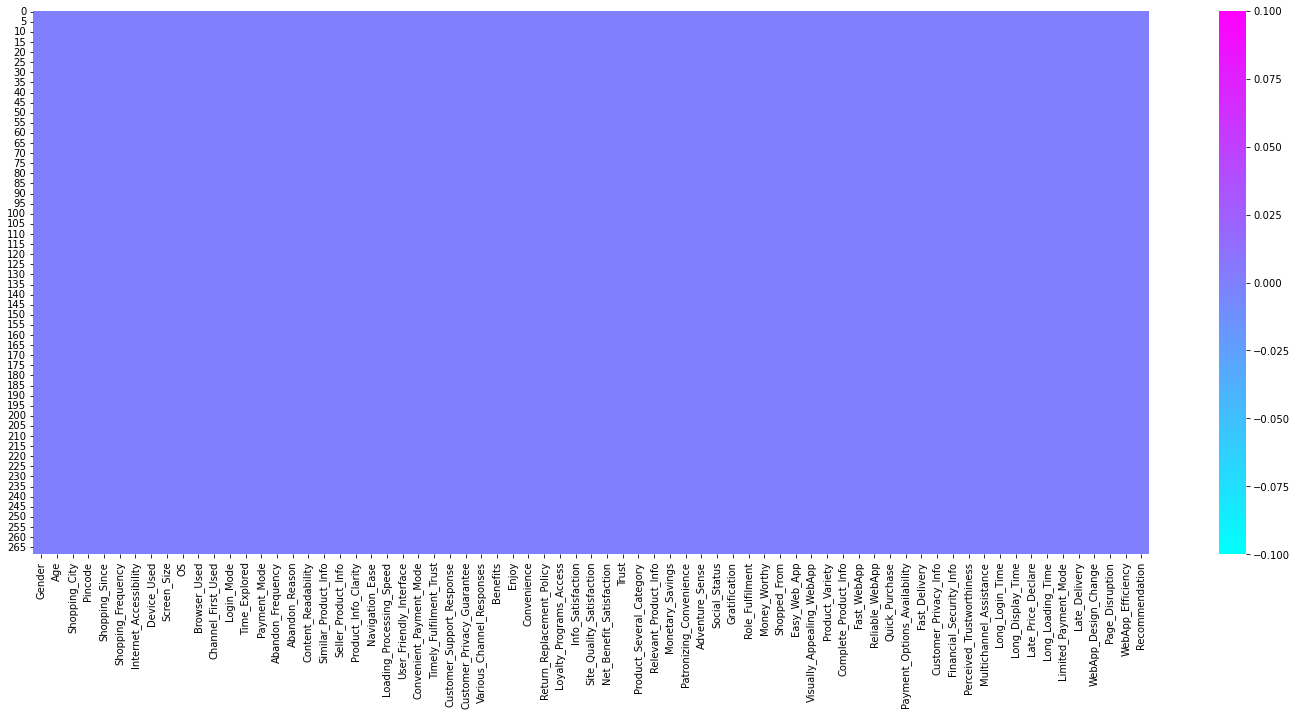

In [12]:
# Let's visualize the null values clearly
plt.figure(figsize=(25,10))
sns.heatmap(CR.isnull(),cmap="cool")
plt.show()

<font color='red'>We can clearly see that we have no null values in the dataset</font>

In [13]:
# Checking the value counts of each columns
for i in CR.columns:
        print(CR[i].value_counts())
        print('*'*100)

Female    181
Male       88
Name: Gender, dtype: int64
****************************************************************************************************
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
****************************************************************************************************
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Shopping_City, dtype: int64
****************************************************************************************************
201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
20100

<font color='red'>These are the list of value counts of each column.</font>

<font color='red'>In the column Shopping_Frequency, both 41 times and above and 42 times and above belongs to same categories, so will replace them by 41 times and above.</font>
    
<font color='red'>The column Internet_Accessibility contains Mobile internet and Mobile Internet which belongs to the same category. So we will replace them using respective categories.</font>
    
<font color='red'>Also the column Abandon_Frequency also contains same categories like Frequently and Very frequently, we need to replace them by Frequently.</font>
    
<font color='red'>From the column 18-47, we can notice the same type of categories like strongly agree, agree and strongly disagree and disagree.</font>
    
<font color='red'>We will replace all the same categories by appropriate values.</font>

In [14]:
# Replacing 42 times and above by 41 times and above in the column Shopping_Frequency
CR["Shopping_Frequency"]=CR["Shopping_Frequency"].replace('42 times and above','41 times and above')

# Replacing Mobile internet by Mobile Internet in the column Internet_Accessibility
CR["Internet_Accessibility"]=CR["Internet_Accessibility"].replace('Mobile internet','Mobile Internet')

# Replacing Very frequently by Frequently in the column Abandon_Frequency
CR["Abandon_Frequency"]=CR["Abandon_Frequency"].replace('Very frequently','Frequently')

In [15]:
# Replacing Strongly agree (5) by Agree (4) in the column Content_Readability
CR["Content_Readability"]=CR["Content_Readability"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Similar_Product_Info
CR["Similar_Product_Info"]=CR["Similar_Product_Info"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) and strongly disagree by dis-agree in the column Seller_Product_Info
CR["Seller_Product_Info"]=CR["Seller_Product_Info"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Seller_Product_Info"]=CR["Seller_Product_Info"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) and Strongly disagree (1) by Dis-agree(2) in the column Product_Info_Clarity
CR["Product_Info_Clarity"]=CR["Product_Info_Clarity"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Product_Info_Clarity"]=CR["Product_Info_Clarity"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Navigation_Ease
CR["Navigation_Ease"]=CR["Navigation_Ease"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Navigation_Ease"]=CR["Navigation_Ease"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Loading_Processing_Speed
CR["Loading_Processing_Speed"]=CR["Loading_Processing_Speed"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Loading_Processing_Speed"]=CR["Loading_Processing_Speed"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column User_Friendly_Interface
CR["User_Friendly_Interface"]=CR["User_Friendly_Interface"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["User_Friendly_Interface"]=CR["User_Friendly_Interface"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Convenient_Payment_Mode
CR["Convenient_Payment_Mode"]=CR["Convenient_Payment_Mode"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Timely_Fulfilment_Trust
CR["Timely_Fulfilment_Trust"]=CR["Timely_Fulfilment_Trust"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Customer_Support_Response
CR["Customer_Support_Response"]=CR["Customer_Support_Response"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Customer_Privacy_Guarantee
CR["Customer_Privacy_Guarantee"]=CR["Customer_Privacy_Guarantee"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Various_Channel_Responses
CR["Various_Channel_Responses"]=CR["Various_Channel_Responses"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) Strongly agree (5) by Agree (4) in the column Benefits
CR["Benefits"]=CR["Benefits"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Benefits"]=CR["Benefits"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Enjoy
CR["Enjoy"]=CR["Enjoy"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Enjoy"]=CR["Enjoy"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Convenience
CR["Convenience"]=CR["Convenience"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Return_Replacement_Policy
CR["Return_Replacement_Policy"]=CR["Return_Replacement_Policy"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Loyalty_Programs_Access
CR["Loyalty_Programs_Access"]=CR["Loyalty_Programs_Access"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Loyalty_Programs_Access"]=CR["Loyalty_Programs_Access"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Info_Satisfaction
CR["Info_Satisfaction"]=CR["Info_Satisfaction"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Site_Quality_Satisfaction
CR["Site_Quality_Satisfaction"]=CR["Site_Quality_Satisfaction"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Net_Benefit_Satisfaction
CR["Net_Benefit_Satisfaction"]=CR["Net_Benefit_Satisfaction"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Trust
CR["Trust"]=CR["Trust"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Trust"]=CR["Trust"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Product_Several_Category
CR["Product_Several_Category"]=CR["Product_Several_Category"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Relevant_Product_Info
CR["Relevant_Product_Info"]=CR["Relevant_Product_Info"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Monetary_Savings
CR["Monetary_Savings"]=CR["Monetary_Savings"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Patronizing_Convenience
CR["Patronizing_Convenience"]=CR["Patronizing_Convenience"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Adventure_Sense
CR["Adventure_Sense"]=CR["Adventure_Sense"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Adventure_Sense"]=CR["Adventure_Sense"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Social_Status
CR["Social_Status"]=CR["Social_Status"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Social_Status"]=CR["Social_Status"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Gratification
CR["Gratification"]=CR["Gratification"].replace('Strongly disagree (1)','Disagree (2)')
CR["Gratification"]=CR["Gratification"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Role_Fulfilment
CR["Role_Fulfilment"]=CR["Role_Fulfilment"].replace('Strongly disagree (1)','Dis-agree (2)')
CR["Role_Fulfilment"]=CR["Role_Fulfilment"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Money_Worthy
CR["Money_Worthy"]=CR["Money_Worthy"].replace('Strongly agree (5)','Agree (4)')

<font color='red'>Now we have replaced the unwanted (duplicate) categories.</font> 

In [16]:
# Checking dataset after replacing the column names and value counts
CR.head()

Gender          Age  Shopping_City  Pincode Shopping_Since  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

   Shopping_Frequency Internet_Accessibility Device_Used Screen_Size  \
0         31-40 times                Dial-up     Desktop      Others   
1  41 times and above                  Wi-Fi  Smartphone  4.7 inches   
2  41 times and above        Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times        Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                  Wi-Fi  Smartphone  4.7 inches   

                      OS  ...          Long_Login_Time  \
0  Window/windows Mobile  ...                Amazon.in   
1                IOS/Mac  ...  Amazon.in, Flipkart.com   
2                Android  ...               Myntra.com   
3                IOS/Mac  ...             Snapdeal.com   
4                IOS/Mac  ...  Flipkart.com, Paytm.com   

          Long_Display_Time Late_Price_Declare Long_Loading_Time  \
0                 Amazon.in       Flipkart.com      Flipkart.com   
1                Myntra.com       snapdeal.com      Snapdeal.com   
2                Myntra.com         Myntra.com        Myntra.com   
3  Myntra.com, Snapdeal.com         Myntra.com         Paytm.com   
4                 Paytm.com          Paytm.com         Paytm.com   

  Limited_Payment_Mode Late_Delivery     WebApp_Design_Change  \
0            Amazon.in     Paytm.com             Flipkart.com   
1         Snapdeal.com  Snapdeal.com                Amazon.in   
2            Amazon.in     Paytm.com                Paytm.com   
3            Paytm.com     Paytm.com  Amazon.in, Flipkart.com   
4         Snapdeal.com     Paytm.com                Amazon.in   

           Page_Disruption                   WebApp_Efficiency  \
0                Amazon.in                           Amazon.in   
1               Myntra.com             Amazon.in, Flipkart.com   
2                Paytm.com                           Amazon.in   
3  Amazon.in, Flipkart.com  Amazon.in, Flipkart.com, Paytm.com   
4             Snapdeal.com                           Paytm.com   

                     Recommendation  
0                      Flipkart.com  
1             Amazon.in, Myntra.com  
2  Amazon.in, Paytm.com, Myntra.com  
3           Amazon.in, Flipkart.com  
4             Amazon.in, Myntra.com  

[5 rows x 71 columns]

### Statistical Overview of the Dataset

In [17]:
CR.describe()

Pincode
count     269.000000
mean   220465.747212
std    140524.341051
min    110008.000000
25%    122018.000000
50%    201303.000000
75%    201310.000000
max    560037.000000

<font color='red'>The describe() method gives the statistical information of only numerical data. In the dataset Pincode is the only column which contains numerical data.</font>
<font color='red'>Its giving the information of count, mean,standard deviation, min, IQR and max values of the column.</font>

## Data Visualization

### Univariate Analysis

In [18]:
def value_count(column):
    counts=len(CR[column].value_counts())
    if counts<5:
        plt.figure(figsize=(5,5))
    elif counts<10:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    elif counts<20:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=CR,palette="hsv")
    plt.show()
    print("*"*125)

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Shopping_City, dtype: int64


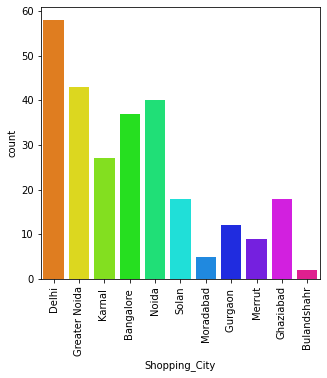

*****************************************************************************************************************************
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Shopping_Since, dtype: int64


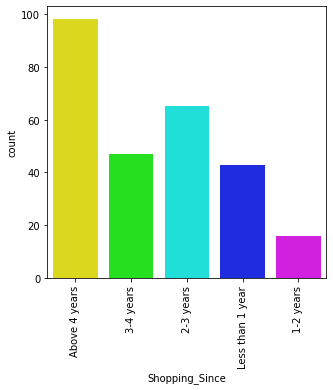

*****************************************************************************************************************************
Less than 10 times    114
31-40 times            63
41 times and above     53
11-20 times            29
21-30 times            10
Name: Shopping_Frequency, dtype: int64


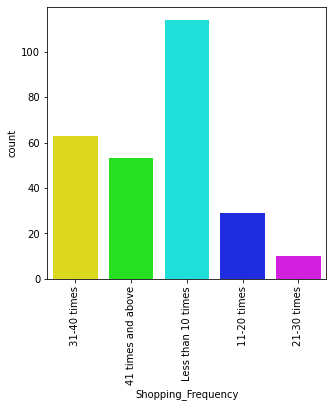

*****************************************************************************************************************************
Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Device_Used, dtype: int64


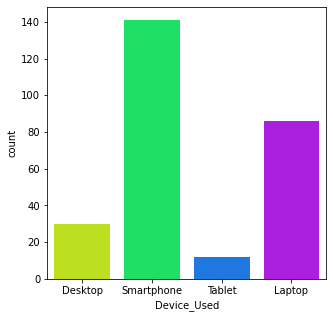

*****************************************************************************************************************************
Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: Screen_Size, dtype: int64


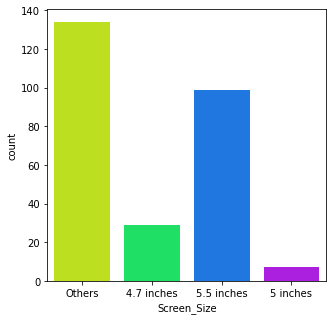

*****************************************************************************************************************************
Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: Browser_Used, dtype: int64


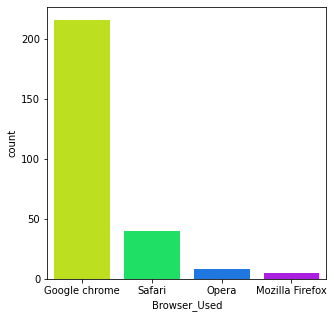

*****************************************************************************************************************************
Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: Login_Mode, dtype: int64


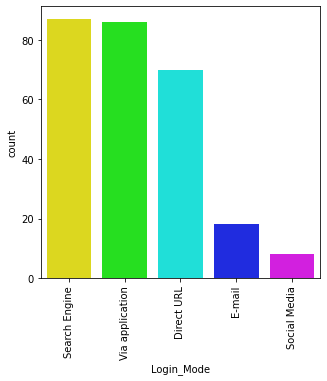

*****************************************************************************************************************************
more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: Time_Explored, dtype: int64


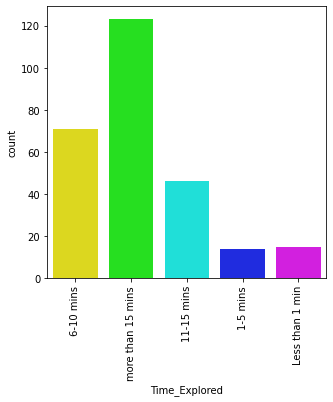

*****************************************************************************************************************************
Sometimes     171
Frequently     50
Never          48
Name: Abandon_Frequency, dtype: int64


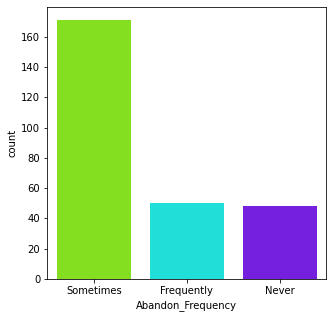

*****************************************************************************************************************************
Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Abandon_Reason, dtype: int64


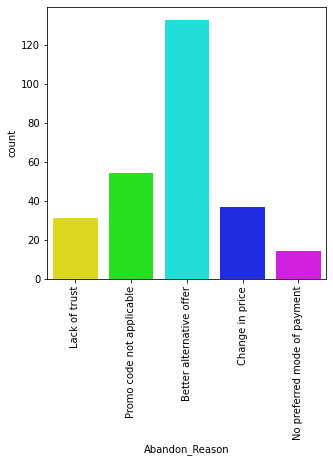

*****************************************************************************************************************************
Agree (4)                244
Strongly disagree (1)     18
Indifferent (3)            7
Name: Content_Readability, dtype: int64


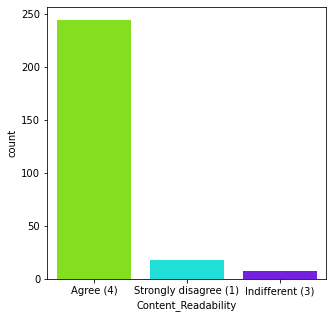

*****************************************************************************************************************************
Agree (4)          208
Indifferent (3)     43
Dis-agree (2)       18
Name: Similar_Product_Info, dtype: int64


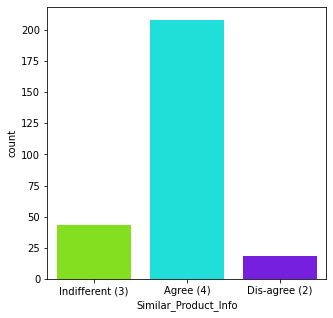

*****************************************************************************************************************************
Agree (4)          188
Indifferent (3)     52
Dis-agree (2)       29
Name: Seller_Product_Info, dtype: int64


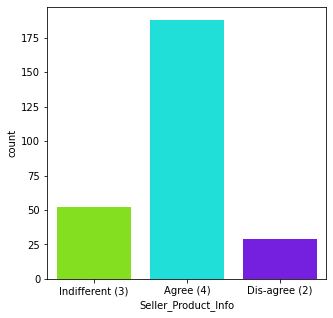

*****************************************************************************************************************************
Agree (4)        239
Dis-agree (2)     30
Name: Product_Info_Clarity, dtype: int64


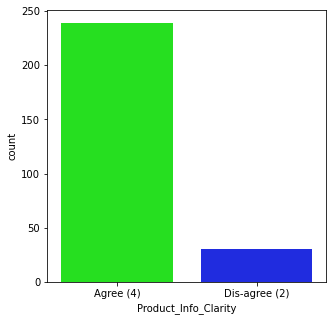

*****************************************************************************************************************************
Agree (4)        246
Dis-agree (2)     23
Name: Navigation_Ease, dtype: int64


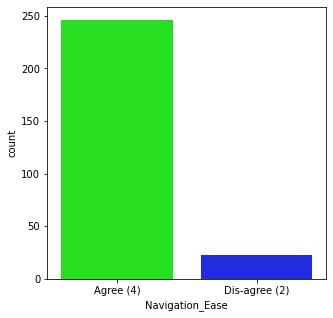

*****************************************************************************************************************************
Agree (4)          227
Dis-agree (2)       30
Indifferent (3)     12
Name: Loading_Processing_Speed, dtype: int64


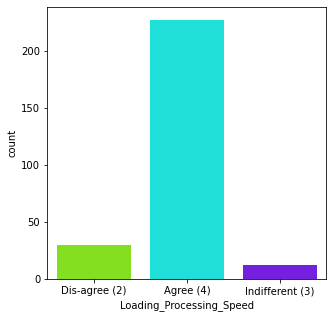

*****************************************************************************************************************************
Agree (4)          234
Dis-agree (2)       30
Indifferent (3)      5
Name: User_Friendly_Interface, dtype: int64


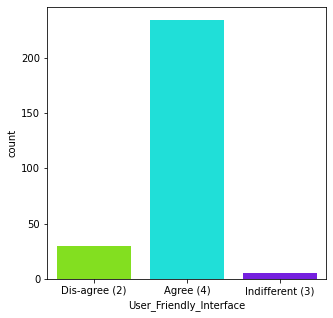

*****************************************************************************************************************************
Agree (4)           227
Disagree (2)         30
indifferent  (3)     12
Name: Timely_Fulfilment_Trust, dtype: int64


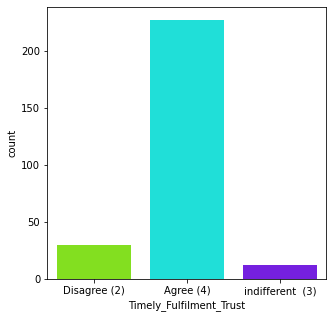

*****************************************************************************************************************************
Agree (4)                236
Strongly disagree (1)     18
indifferent (3)           15
Name: Customer_Support_Response, dtype: int64


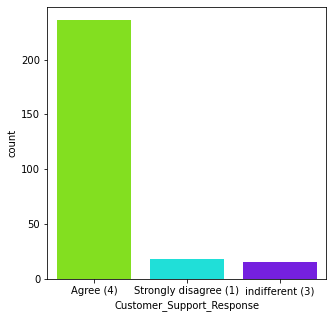

*****************************************************************************************************************************
Agree (4)                243
indifferent (3)           15
Strongly disagree (1)     11
Name: Various_Channel_Responses, dtype: int64


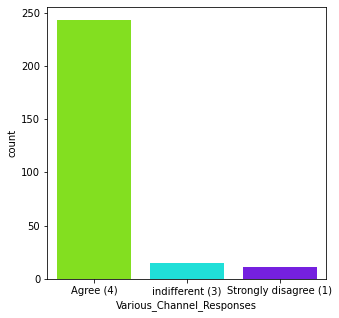

*****************************************************************************************************************************
Agree (4)          224
indifferent (3)     33
Dis-agree (2)       12
Name: Convenience, dtype: int64


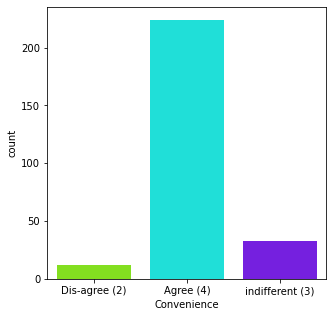

*****************************************************************************************************************************
Agree (4)          205
indifferent (3)     57
Dis-agree (2)        7
Name: Product_Several_Category, dtype: int64


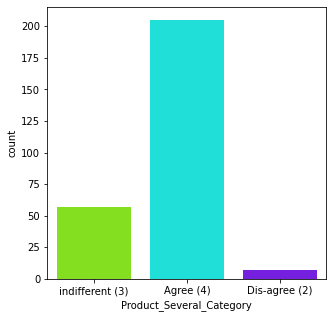

*****************************************************************************************************************************
Agree (4)          233
indifferent (3)     31
Disagree (2)         5
Name: Relevant_Product_Info, dtype: int64


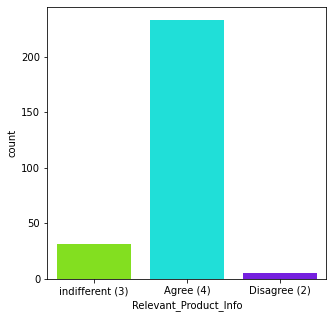

*****************************************************************************************************************************
Agree (4)          126
indifferent (3)     88
Dis-agree (2)       55
Name: Role_Fulfilment, dtype: int64


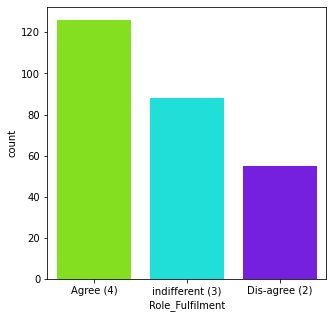

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: Shopped_From, dtype: int64


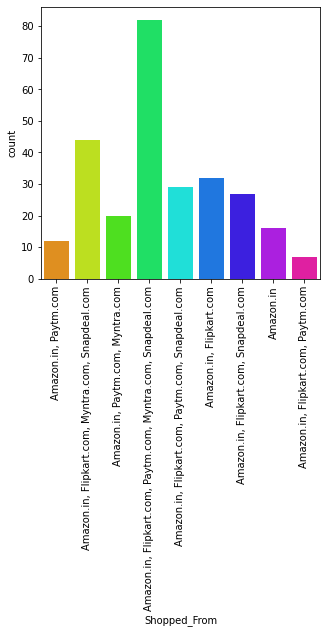

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy_Web_App, dtype: int64


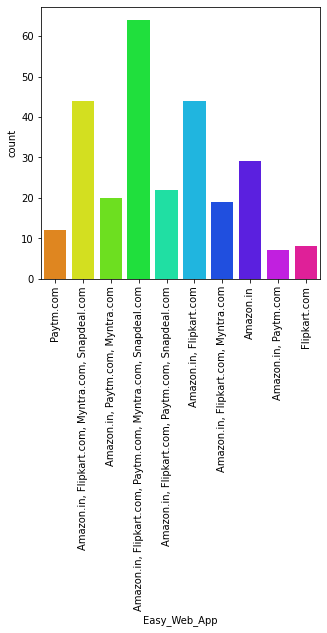

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visually_Appealing_WebApp, dtype: int64


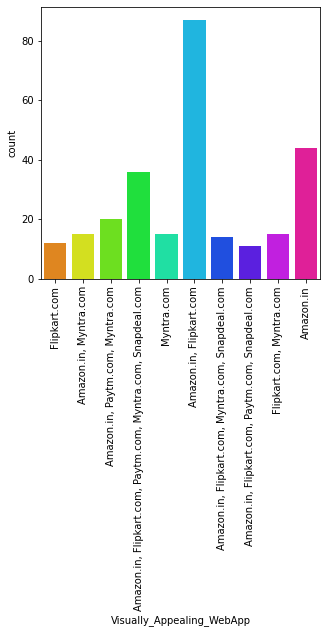

*****************************************************************************************************************************
Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Product_Variety, dtype: int64


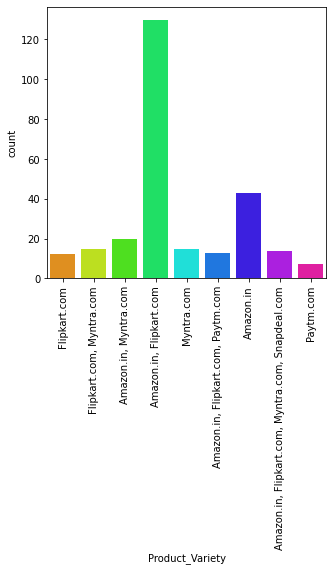

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete_Product_Info, dtype: int64


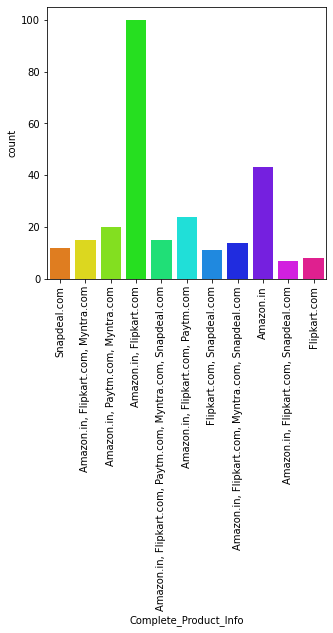

*****************************************************************************************************************************
Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast_WebApp, dtype: int64


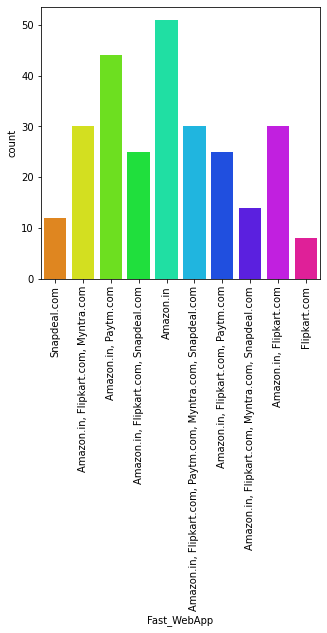

*****************************************************************************************************************************
Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliable_WebApp, dtype: int64


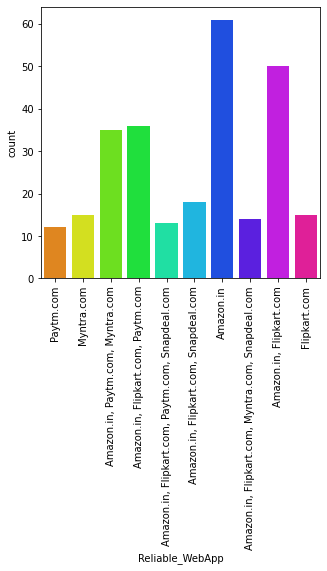

*****************************************************************************************************************************
Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quick_Purchase, dtype: int64


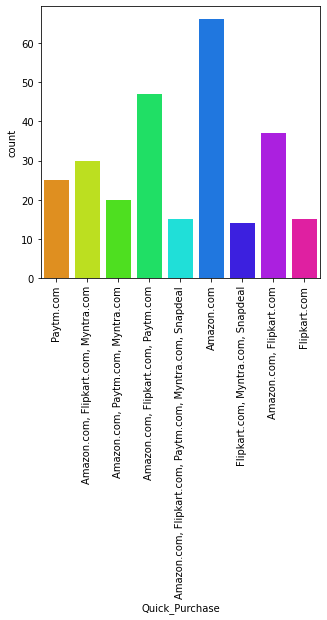

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Payment_Options_Availability, dtype: int64


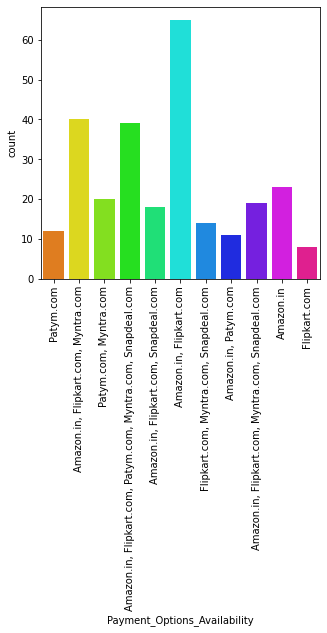

*****************************************************************************************************************************
Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Fast_Delivery, dtype: int64


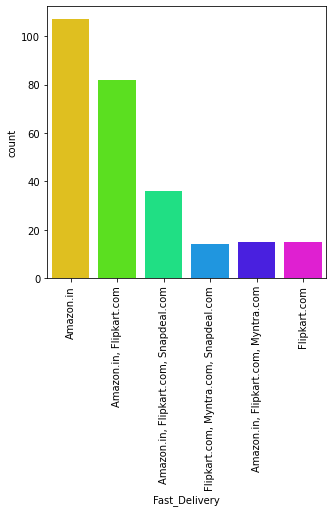

*****************************************************************************************************************************
Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Customer_Privacy_Info, dtype: int64


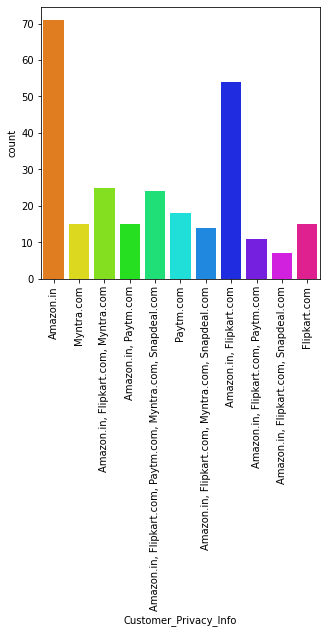

*****************************************************************************************************************************
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Financial_Security_Info, dtype: int64


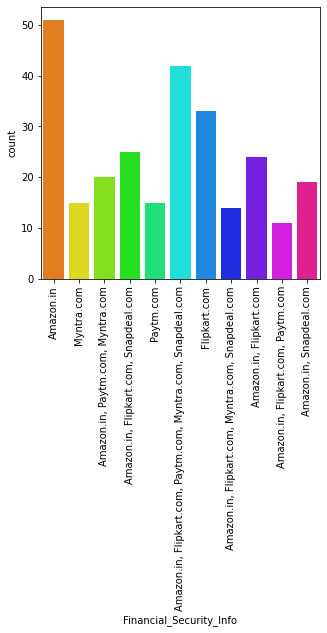

*****************************************************************************************************************************
Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived_Trustworthiness, dtype: int64


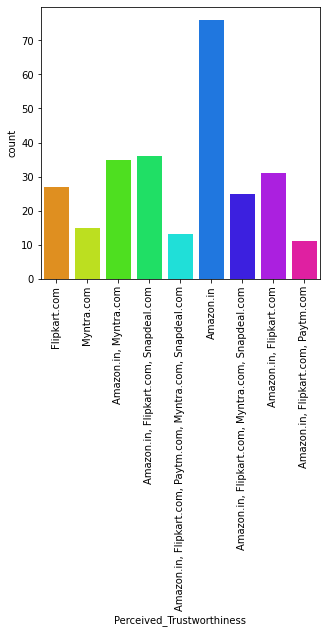

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Multichannel_Assistance, dtype: int64


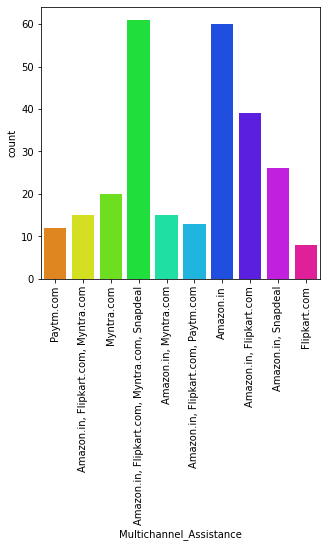

*****************************************************************************************************************************
Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Long_Login_Time, dtype: int64


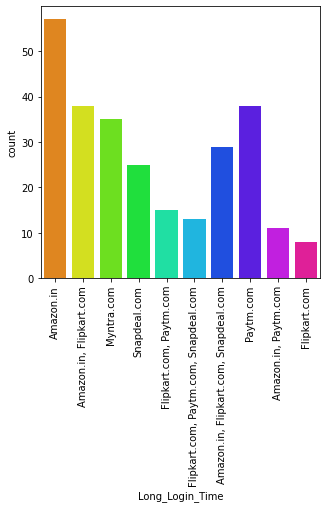

*****************************************************************************************************************************
Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Long_Display_Time, dtype: int64


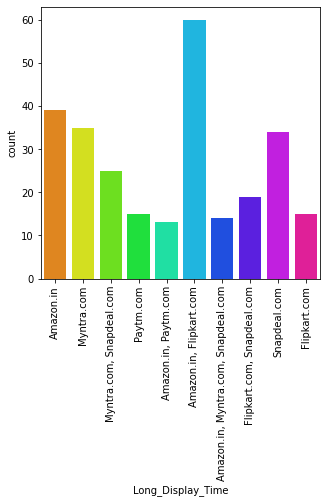

*****************************************************************************************************************************
Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late_Price_Declare, dtype: int64


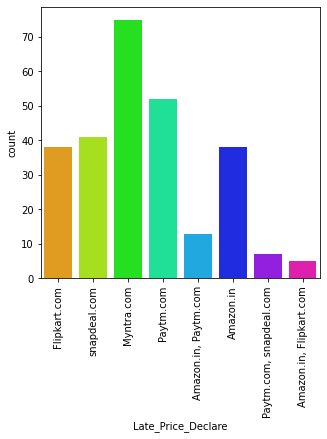

*****************************************************************************************************************************
Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Long_Loading_Time, dtype: int64


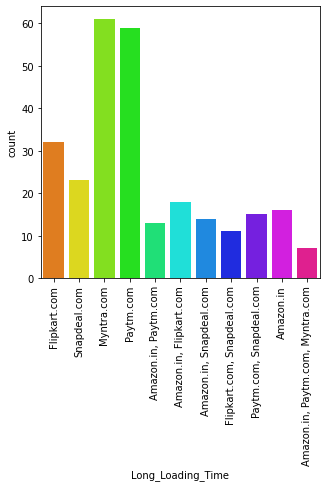

*****************************************************************************************************************************
Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited_Payment_Mode, dtype: int64


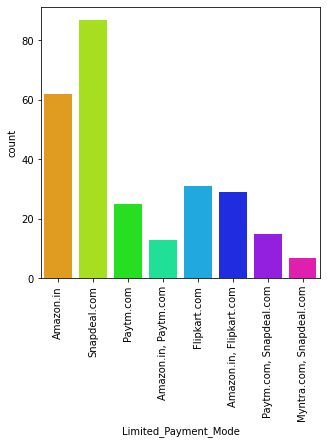

*****************************************************************************************************************************
Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Late_Delivery, dtype: int64


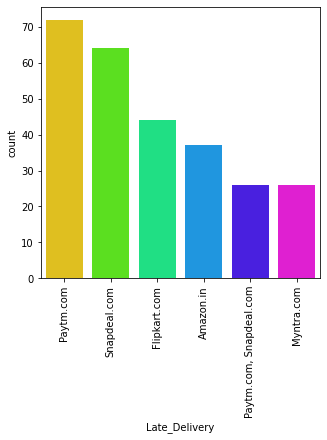

*****************************************************************************************************************************
Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: WebApp_Design_Change, dtype: int64


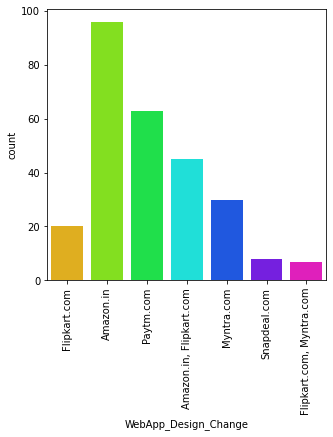

*****************************************************************************************************************************
Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Page_Disruption, dtype: int64


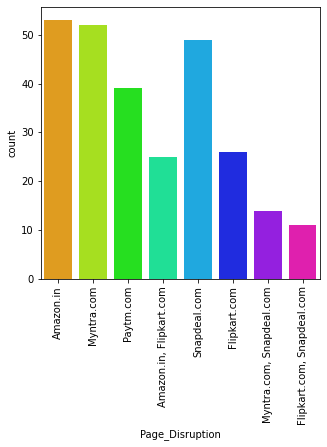

*****************************************************************************************************************************
Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: WebApp_Efficiency, dtype: int64


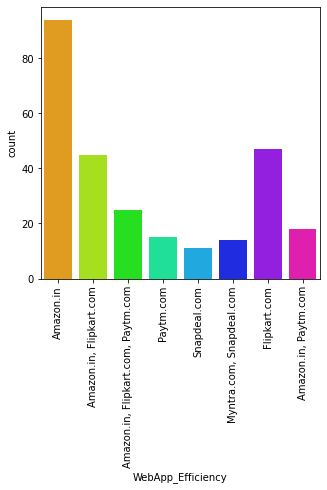

*****************************************************************************************************************************
Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Recommendation, dtype: int64


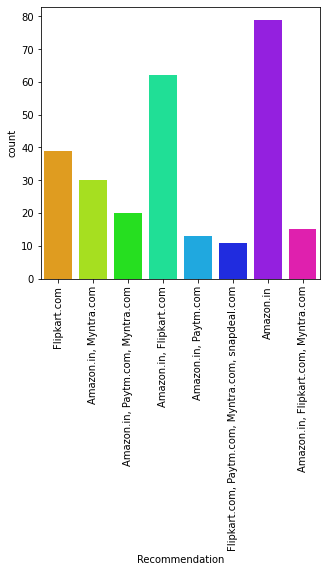

*****************************************************************************************************************************


In [19]:
CR1=CR.iloc[:,[2,4,5,7,8,10,12,13,15,16,17,18,19,20,21,22,23,25,26,28,31,38,39,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
for i in CR1:
    print(CR1[i].value_counts())
    value_count(i)

**Observations:**

<font color='red'>Most of the customers from the city Delhi, Greater Noida, Noida and Bangalore are used to shop onine and the shopping count is high in these cities.</font>

<font color='red'>Most of the customers found shopping online for more than 4 years and the count is high for the same followed by the customers shopping for 2-3 years.</font>

<font color='red'>In last 1 year, most of the customers were purchased online less than 10 times and only few of the customers purchased online 21-30 times.</font>

<font color='red'>Most of the customers used Smartphone device to access the online shopping and least customers used Tablet to access the online shopping.</font>

<font color='red'>The count is high for others mobile screen size followed by 5.5 inches screen size and 5 inches screen size has least count. That means, the customers who have thier mobile screen size other than mentioned inches shopped more online followed by 5.5 inches and the customers having mobile screen size 5 inches shopped very less.</font>

<font color='red'>Most of the customers used Google chrome to access the website and only few of the customers used Opera and Mozilla Firefox to access the online shopping website.</font>

<font color='red'>Most of the customers used Search Engine and Via application to reach the online retail store after their first visit and also some customers used Detect URL to reach the online store. Which means these customers have downloaded their most favourite application to reach the online stores easily.</font>

<font color='red'>Many customers took more than 15 mins before making the purchase decision and some of the customers explored 6-10 mins.
Most of the customers abandoned their shopping cart sometimes and some of the customers abandoned their shopping cart frequently.</font>

<font color='red'>Around 133 customers abandoned their bag due to some better alternative offer and 54 customers abandoned due to promo code not applicable.</font>

<font color='red'>Around 90% of the customers agreed that the content on the website is easy to read and understand.</font>

<font color='red'>Around 77% of the customers agreed that the information on similar product to the one highlighted is important for product comparison.</font>

<font color='red'>About 70% of the customers agreed that complete information on listed seller and product being offered is important for purchase decision.</font>

<font color='red'>88.84% of the customers agreed that all relevant information on listed products must be stated clearly and only 11% of the customers disagreed with it.</font>

<font color='red'>91% of the customers agreed that ease of navigation in website helps them more.</font>

<font color='red'>Most of the customers agreed that they have no issues with the loading and processing speed.</font>

<font color='red'>87% of the customers agreed with user friendly website interface. Creating new user friendly websites will impact on customers to shop more online. By doing this customers don't have to work around much and overall shoping experience would be smooth.</font>

<font color='red'>84% of the customers trusted that the online retail store will fulfill its part of the transaction at the stipulated time.</font>
<font color='red'>The count is high for the customers who agreed the empathy (readiness to assist with queries) towards the customers in the online shopping website is very helpful. If the online shopping companies ready to assist with customers queries then there will be benefit for both company and the customers.</font>

<font color='red'>The count is high for the customers who agreed that the responsiveness, availability of several communication channels will help them more while shopping online which means if one channel is not available then customers can easily reach out to other channel to fulfill their benifits. So it is important for the companies to provide various channels to communicate with the customers.</font>

<font color='red'>83% of the customers agreed that shopping online is convenient and flexible and 12% of the customers are indifferent which means either they are agreed to this or disagreed and only 5% of the customers completely disagreed with it.</font>
<font color='red'>Most of the customers agreed to offering a wide variety of listed product in several category and the count is high for the same.</font>

<font color='red'>Around 86% of the customers would like to have provision of complete and relevant product information in the online shopping website.</font>

<font color='red'>47% of the customers agreed that shopping on the website helps them fulfilling certain roles and 33% of the customers are in confusion whether to agree or disagree and only 20% of the customers disagrees with it.</font>

<font color='red'>Most of the people shopped from Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com companies and they think that it is easy to use website or applicatiion in these companies.</font>

<font color='red'>Amazon.in and Flipkart.com have high visual appealing web-page layout compared to others.</font>

<font color='red'>48% of the customers says that amazon and flipkart shows wide variety of products in their shopping websited compared to other websites. It's important for the companies to show different types of products to gain customers rate.</font>

<font color='red'>37% of the customers liked amazon and flipkart in displaying complete and relevant information of the products.</font>

<font color='red'>Around 51 customers says that Amazon.in is the fast loading website and application and they liked it. About 44 customers liked the web speed of both amazon and paytm followed by amazon ad flipkart.</font>

<font color='red'>The count is high for amazon followed by amazon and flipkart which means most of the customers liked the reliability of website or application in amazon and flipkart.</font>

<font color='red'>Most of the customers likes Amazon's quickness to complete the purchase followed by Flipart's and only few of the customers likes Myntra website.</font>

<font color='red'>In Amazon and flipkart websites there are several payment options available compared to the other shopping websites.
Most of the customers liked Amazon's delivery speed followed by flipkart and snapdeal.</font>

<font color='red'>Most of the customers trusts amazon followed by flipkart in terms of keeping the privacy of their data information.</font>

<font color='red'>The count is high for the customers who belives that amazon website keeps their finanacial information secrete also the customers trusts flipkart, Myntra, Snapdeal and paytm in terms of keeping thier finanacial information secured.</font>

<font color='red'>Most of the customers believed that Amazon has perceived trustworthiness comapared to others. Apart from this customers believed that flipkart and Myntra also have perceived trustworthiness.</font>

<font color='red'>Most of the customers like Amazon inerms of presence of online assistance through multi-channel followed by flipkart,Myntra and snapdeal.</font>

<font color='red'>Most of the customers agreed that Amazon takes longer time to get logged them in.</font>

<font color='red'>Customers believes that Amazon and flipkart takes longer time in display the graphics and photos in sales period.</font>

<font color='red'>Customers says that Myntra and paytm have late declaration of price in promotion/sales period compared to others.</font>

<font color='red'>Also Myntra and paytm takes longer page loading time.</font>

<font color='red'>Snapdeal.com has limited mode of payment on most products followed by Amazon.in.</font>

<font color='red'>In terms of time taken in product delivery Paytm has highest count followed by Snapdeal.com.</font>

<font color='red'>Most of the customers disliked change in website/Application design on amazon followed by paytm.</font>

<font color='red'>Most of the customers disliked frequent disruption when moving from one page to another on amazon, Myntra and snapdeal.</font>

<font color='red'>Most of the customers believes that Amazon and flipkart website is as efficient as before.</font>

<font color='red'>Most of the customers would like to recommend amazon retailer to a friend followed by flipkart.</font>

Pie plot for the column: Gender
Female    181
Male       88
Name: Gender, dtype: int64


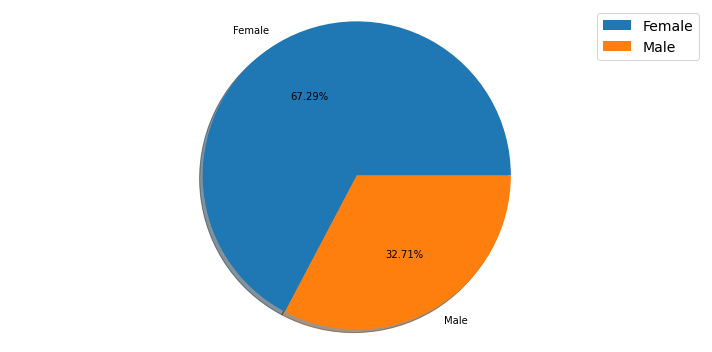

*****************************************************************************************************************************
Pie plot for the column: Age
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


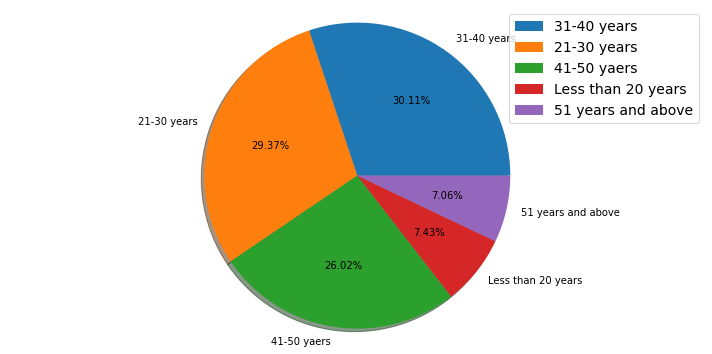

*****************************************************************************************************************************
Pie plot for the column: Internet_Accessibility
Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: Internet_Accessibility, dtype: int64


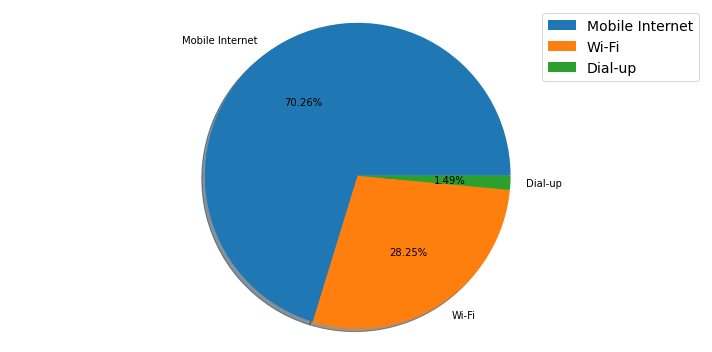

*****************************************************************************************************************************
Pie plot for the column: OS
Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


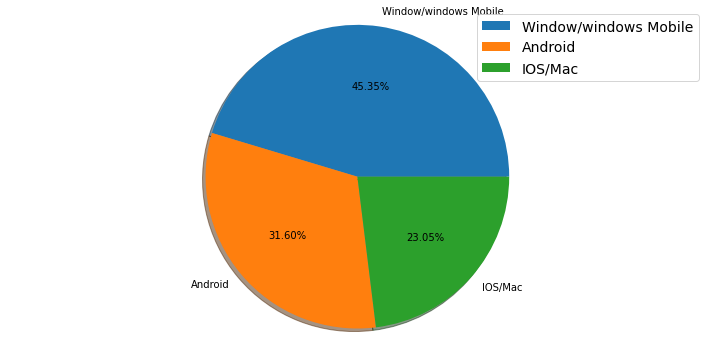

*****************************************************************************************************************************
Pie plot for the column: Channel_First_Used
Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Channel_First_Used, dtype: int64


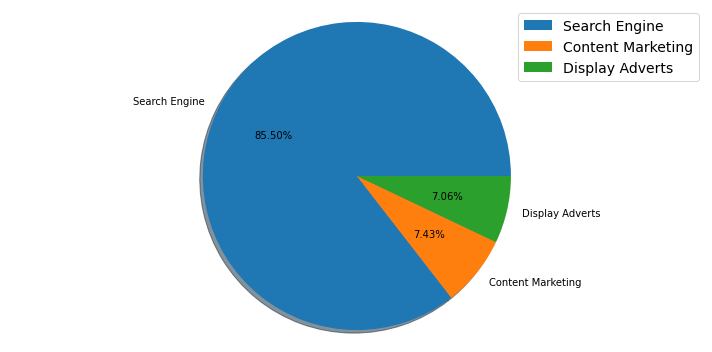

*****************************************************************************************************************************
Pie plot for the column: Payment_Mode
Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Payment_Mode, dtype: int64


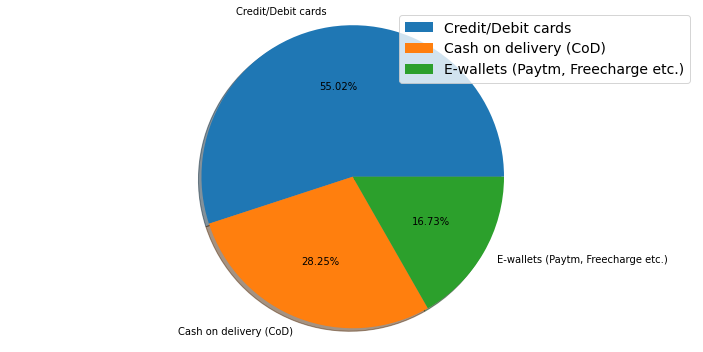

*****************************************************************************************************************************
Pie plot for the column: Convenient_Payment_Mode
Agree (4)        239
Dis-agree (2)     30
Name: Convenient_Payment_Mode, dtype: int64


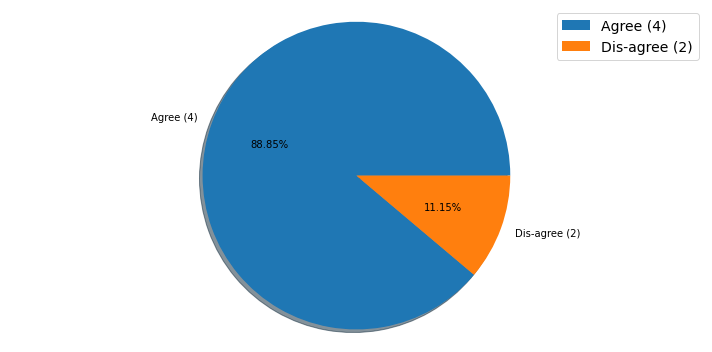

*****************************************************************************************************************************
Pie plot for the column: Customer_Privacy_Guarantee
Agree (4)          243
indifferent (3)     26
Name: Customer_Privacy_Guarantee, dtype: int64


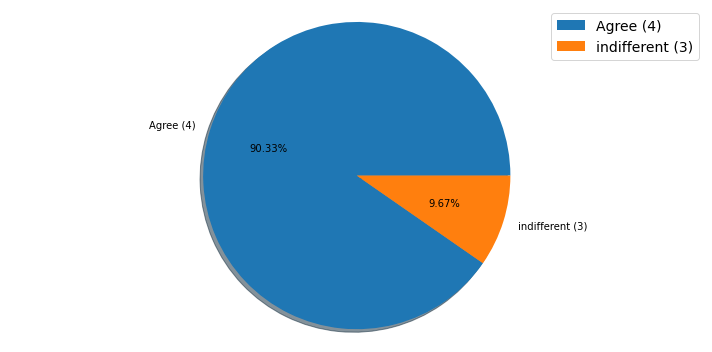

*****************************************************************************************************************************
Pie plot for the column: Benefits
Agree (4)          190
indifferent (3)     50
Dis-agree (2)       29
Name: Benefits, dtype: int64


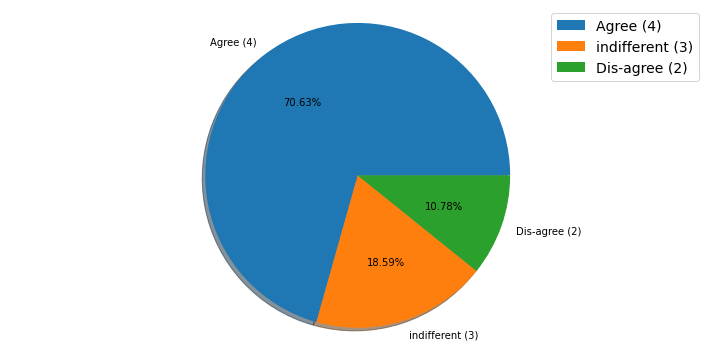

*****************************************************************************************************************************
Pie plot for the column: Enjoy
Agree (4)          145
indifferent (3)     75
Dis-agree (2)       49
Name: Enjoy, dtype: int64


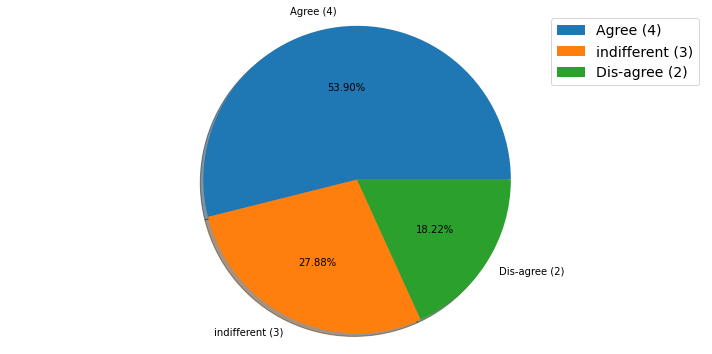

*****************************************************************************************************************************
Pie plot for the column: Return_Replacement_Policy
Agree (4)        249
Dis-agree (2)     20
Name: Return_Replacement_Policy, dtype: int64


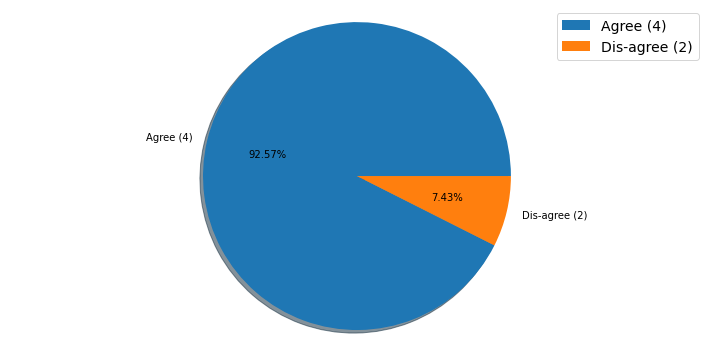

*****************************************************************************************************************************
Pie plot for the column: Loyalty_Programs_Access
Agree (4)          179
indifferent (3)     64
Dis-agree (2)       26
Name: Loyalty_Programs_Access, dtype: int64


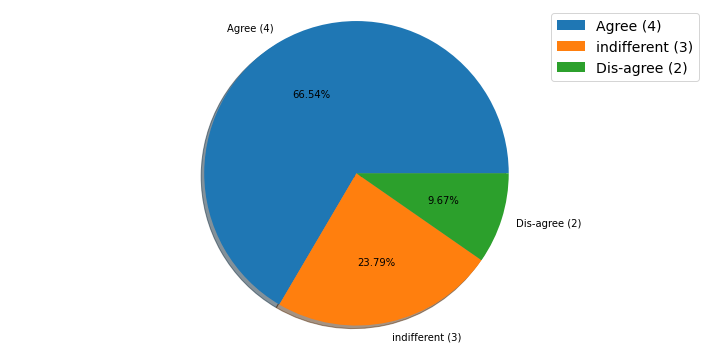

*****************************************************************************************************************************
Pie plot for the column: Info_Satisfaction
Agree (4)          213
indifferent (3)     56
Name: Info_Satisfaction, dtype: int64


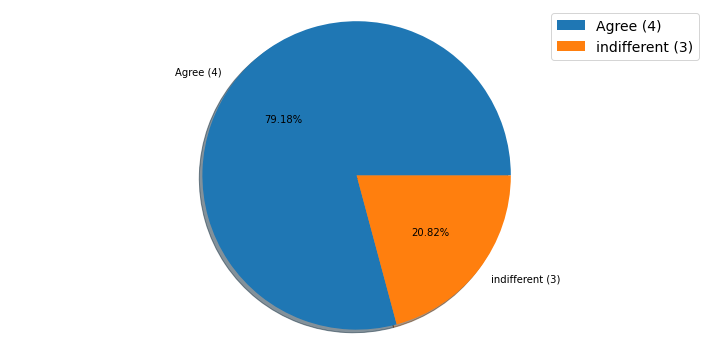

*****************************************************************************************************************************
Pie plot for the column: Site_Quality_Satisfaction
Agree (4)        261
Dis-agree (2)      8
Name: Site_Quality_Satisfaction, dtype: int64


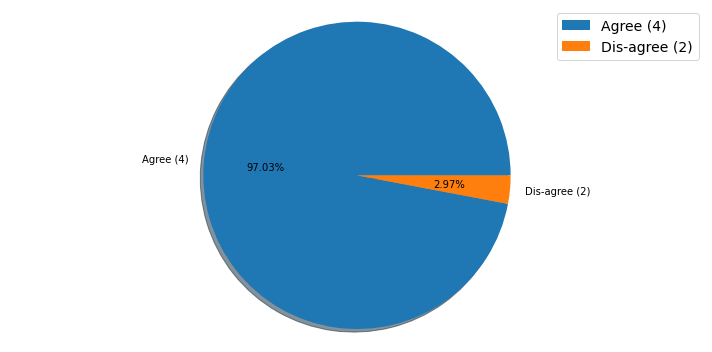

*****************************************************************************************************************************
Pie plot for the column: Net_Benefit_Satisfaction
Agree (4)          218
indifferent (3)     40
Dis-agree (2)       11
Name: Net_Benefit_Satisfaction, dtype: int64


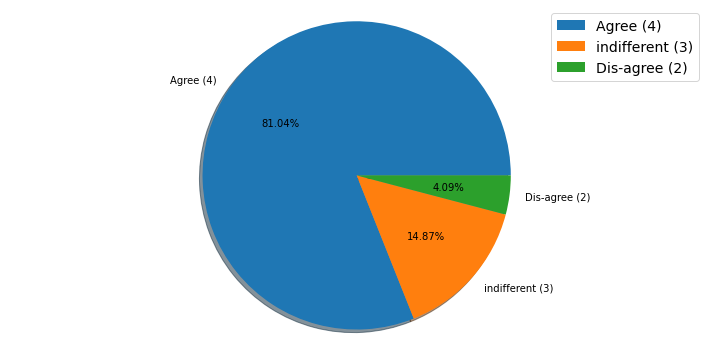

*****************************************************************************************************************************
Pie plot for the column: Trust
Agree (4)          239
Dis-agree (2)       25
indifferent (3)      5
Name: Trust, dtype: int64


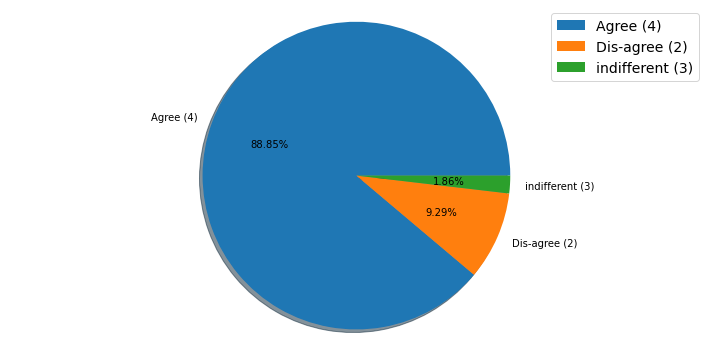

*****************************************************************************************************************************
Pie plot for the column: Monetary_Savings
Agree (4)          223
Disagree (2)        31
indifferent (3)     15
Name: Monetary_Savings, dtype: int64


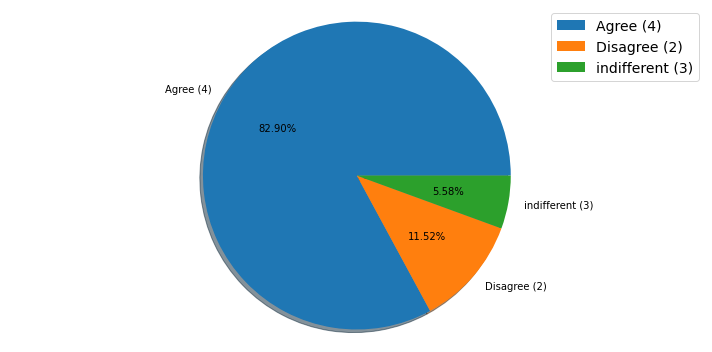

*****************************************************************************************************************************
Pie plot for the column: Patronizing_Convenience
Agree (4)          192
indifferent (3)     77
Name: Patronizing_Convenience, dtype: int64


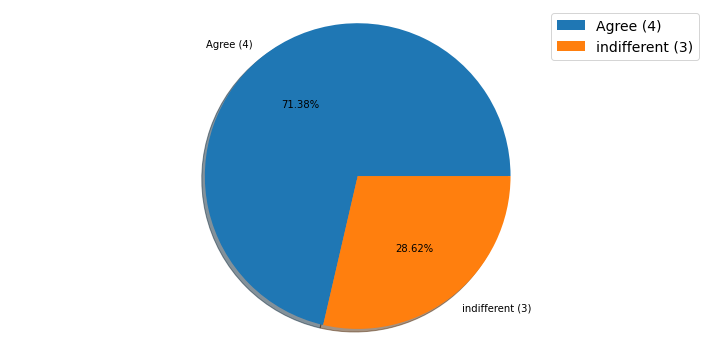

*****************************************************************************************************************************
Pie plot for the column: Adventure_Sense
Agree (4)          155
indifferent (3)     59
Dis-agree (2)       55
Name: Adventure_Sense, dtype: int64


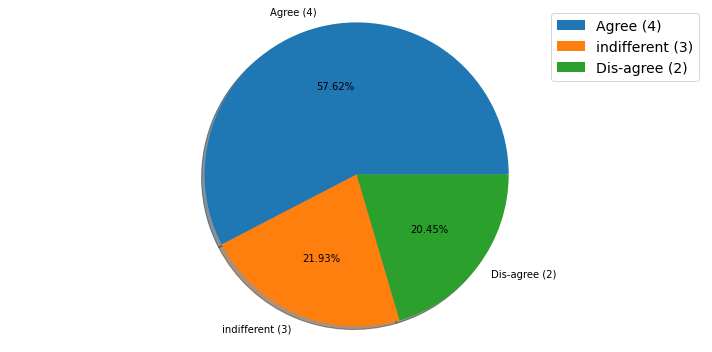

*****************************************************************************************************************************
Pie plot for the column: Social_Status
Agree (4)          107
indifferent (3)    100
Dis-agree (2)       62
Name: Social_Status, dtype: int64


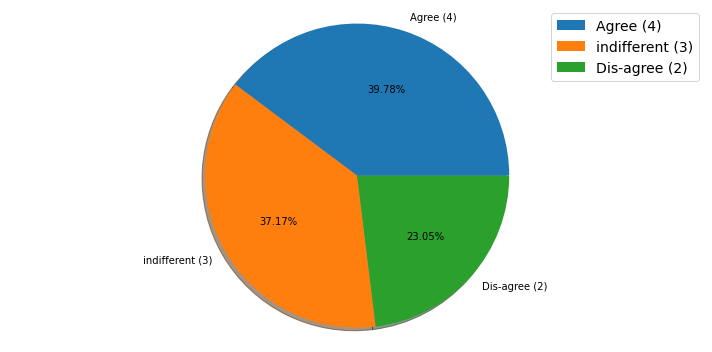

*****************************************************************************************************************************
Pie plot for the column: Gratification
Agree (4)          128
indifferent (3)    101
Disagree (2)        40
Name: Gratification, dtype: int64


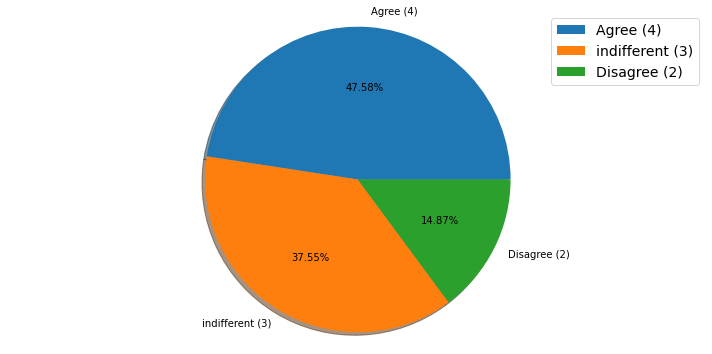

*****************************************************************************************************************************
Pie plot for the column: Money_Worthy
Agree (4)          231
indifferent (3)     38
Name: Money_Worthy, dtype: int64


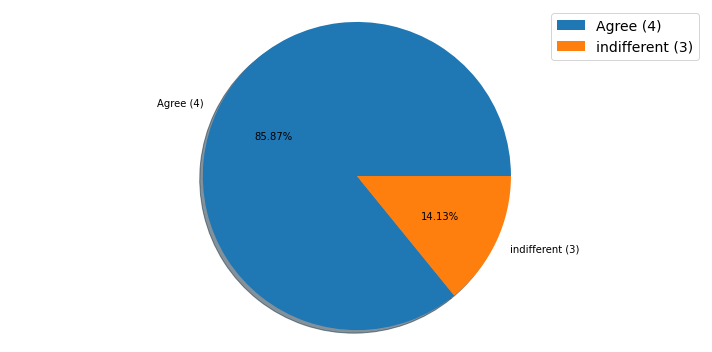

*****************************************************************************************************************************


In [20]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['Gender', 'Age', 'Internet_Accessibility','OS','Channel_First_Used', 'Payment_Mode','Convenient_Payment_Mode','Customer_Privacy_Guarantee','Benefits','Enjoy','Return_Replacement_Policy','Loyalty_Programs_Access','Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Monetary_Savings','Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Money_Worthy']

plotnumber=1
for j in CR[cols1]:
    print(f"Pie plot for the column:", j)
    print(CR[j].value_counts())
    generate_pie(CR[j])
    print("*"*125)

**Observations:**

<font color='red'>Gender of respondent: The number of gender of respondent for Female customers have high counts compared to Male customers. That is around 67% of female customers shopped online and only 32% of male customers shopped online.</font>

<font color='red'>Age: The count is high for customers whose age is between 31-40 years and they shopped more from the online stores followed by the customers' age between 21-30 years and 41-50 years.</font>

<font color='red'>Internet_Accessibility: 70% of the customers access Mobile Internet to for online purchase and 28% of the customers used WiFi to shop online and only 1% of the customers used Dial-up method to shop online.</font>

<font color='red'>OS: About 45% of the customers' operating system is Windows/windows Mobile and the count is also high for the same followed by the customers having Android OS.</font>

<font color='red'>Channel_First_Used: Around 85.50% of the customers used Search Engine channel to arrive at their favorite online store for the first time.</font>

<font color='red'>Payment_Mode: Most of the customers prefer to pay the bill using Credit/Debit cards and some of the customers prefer cash on delivery and very few of customers use E-wallets payment methods.</font>

<font color='red'>Convenient_Payment_Mode: 88.85% of the customers agreed to the convenient payment mode and only 11% of the customers disagreed to convenient payment mode method.</font>

<font color='red'>Customer_Privacy_Guarantee: Being able to guarantee the privacy of the customer also got 90% agree. That is the customers are concerned about the unauthorized access to their data. Protecting user privacy will enable stores to drive more revenue and gain more customers. Only 9.67% of the customers in neutral state which means they are in confusion whether to agree with this method or not.</font>

<font color='red'>Benefits: About 70% of the customers agreed that the online shopping gives monetary benifita and discounts.</font>

<font color='red'>Enjoy: 53.90% of the customers agreed that they enjoys online shoppings and only 18% of the customers disagreed.
Return_Replacement_Policy: Around 73% of the customers strongly agree and 19% of the customers agree that the return and replacement policy helps them making purchase decision. It is evident from the fact that the customers actually not liking the products completely, they are just purchasing the products and returning them in case of any dissatisfaction. So it is important for the online shopping websites to make easy return and replacement policy if they want to retain their customers.</font>

<font color='red'>Loyalty_Programs_Access: 66% of the customers agrees that gaining access to loyalty programs is a benefit of shopping online.</font>

<font color='red'>Info_Satisfaction: 79% of the customers agreed that displaying quality information on the website improves satisfaction of customers since they believe that displaying quality information have significant association with customer satisfaction. And remaining 21% of the customers are in neutral situation.</font>

<font color='red'>Site_Quality_Satisfaction: 97% of the customers agreed that they are satisfied while shopping on a good quality website and 3% of the customers disagreed with it.</font>

<font color='red'>Net_Benefit_Satisfaction: About 81% of the customers agreed that the net benefit derived from shopping online can lead to users satisfaction.</font>

<font color='red'>Trust: 88.85% agreed that the customers satisfaction cannot exists without trust. The companies must learn how to manage the customers' trust.</font>

<font color='red'>Monetary_Savings: 82.90% customers agreed to receive monetary savings.The ecommerce company need to know that the best way to sell online is to make the consumer feel that he is saving money doing so. And not just feel, online shopping should result in a lot of saving for the consumer. This saving would automatically get converted into trust and brand equity for the seller. To do this the online companies should offer the best deals and bargains to the consumer through social platforms. If the retailers gives some discounted prices then the customers can make money savings.</font>

<font color='red'>Patronizing_Convenience: 71% of the customers agreed that the Convenience of patronizing the online retailer.
Adventure_Sense: 57% of the customers agreed that shopping on the website gives the sense of adventure. The adventures in the shopping websites gives positive activity to experience an amplified enjoyment to the customers while shopping on websites.</font>

<font color='red'>Social_Status: Around 39.78% customers agreed that shopping on preferred e-tailer enhances the social status of the customers.</font>

<font color='red'>Gratification: 47.58% of the customers agreed that they felt gratified while shopping on their favourite e-tailer.
Money_Worthy: Around 86% of the customers agreed that they are getting value for their money while shopping and 14% of the customers thinks either they are wasting money or getting benefit products from their money.</font>

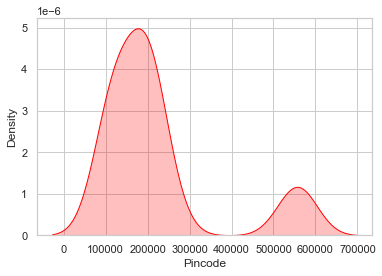

In [21]:
# Distribution plot for the column Pincode
sns.set(style="whitegrid")

sns.distplot(CR["Pincode"],color="red",kde_kws={"shade": True},hist=False)
plt.show()

<font color='red'>The data is not normally distributed in this column and there is skewness present in the data, it is almost skewed to right.</font>

### Bivariate Analysis

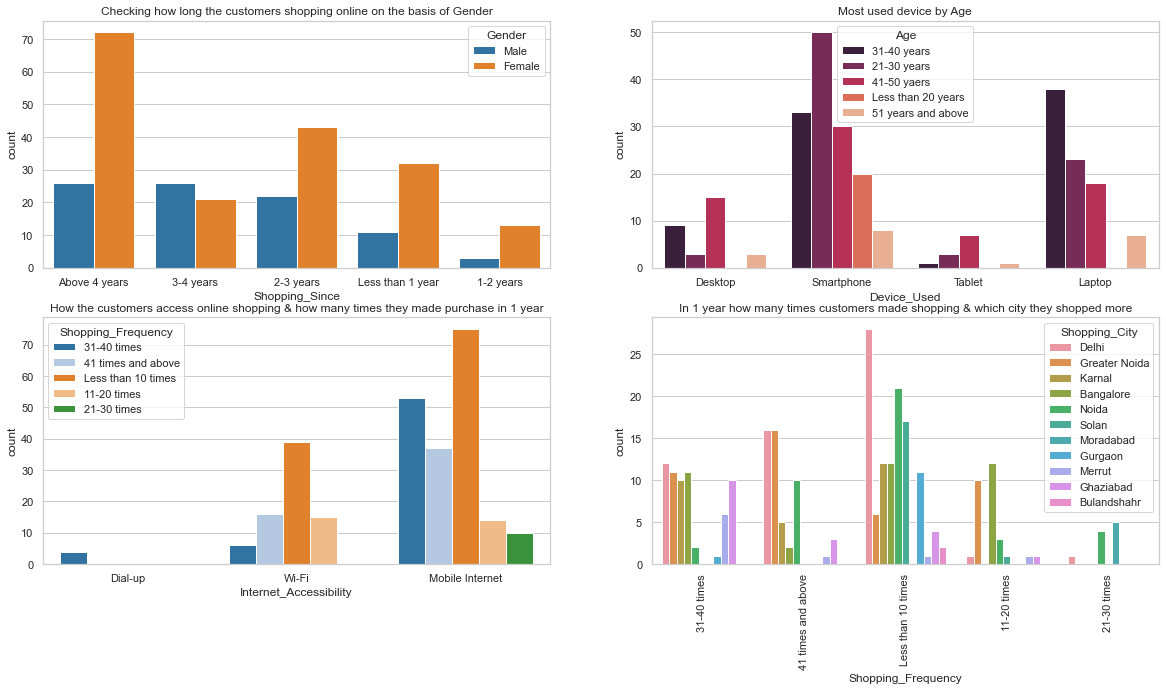

In [22]:
# Comparision between two variables
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.title('Checking how long the customers shopping online on the basis of Gender')
sns.countplot(CR['Shopping_Since'],hue=CR['Gender'],palette="tab10");

plt.subplot(2,2,2)
plt.title('Most used device by Age')
sns.countplot(CR['Device_Used'],hue=CR['Age'],palette="rocket");

plt.subplot(2,2,3)
plt.title('How the customers access online shopping & how many times they made purchase in 1 year')
sns.countplot(CR['Internet_Accessibility'],hue=CR['Shopping_Frequency'],palette="tab20");

plt.subplot(2,2,4)
plt.title('In 1 year how many times customers made shopping & which city they shopped more')
sns.countplot(CR['Shopping_Frequency'],hue=CR['Shopping_City']);

plt.xticks(rotation=90)
plt.subplot(2,2,3).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="Shopping_City");
plt.show()

**Observations:**
    
<font color='red'>Most of the female customers shopped online from more than 4 years and the count is also high for the females who shopped from 2-3 years. And only few male customers shop online more than 4 years. Which means the female customers are more enthusiastic to buy products from the online shopping websites.</font>

<font color='red'>Many customers whose age between 31-40 years and 21-30 years used Smartphones followed by Laptops to access the online shopping websites.</font>

<font color='red'>Most of the customers access the shopping websites more than 31-40 times in 1 year through Mobile Internet to shop the products also most of the customers who used mobile internet to access the online shopping website made online purchase less than 10 times in a year. And only few of the customers used WiFi network to access the shopping store.</font>

<font color='red'>Most of the customers used ecommerce websites less than 10 times in a year from the city Delhi to shop the products.</font>

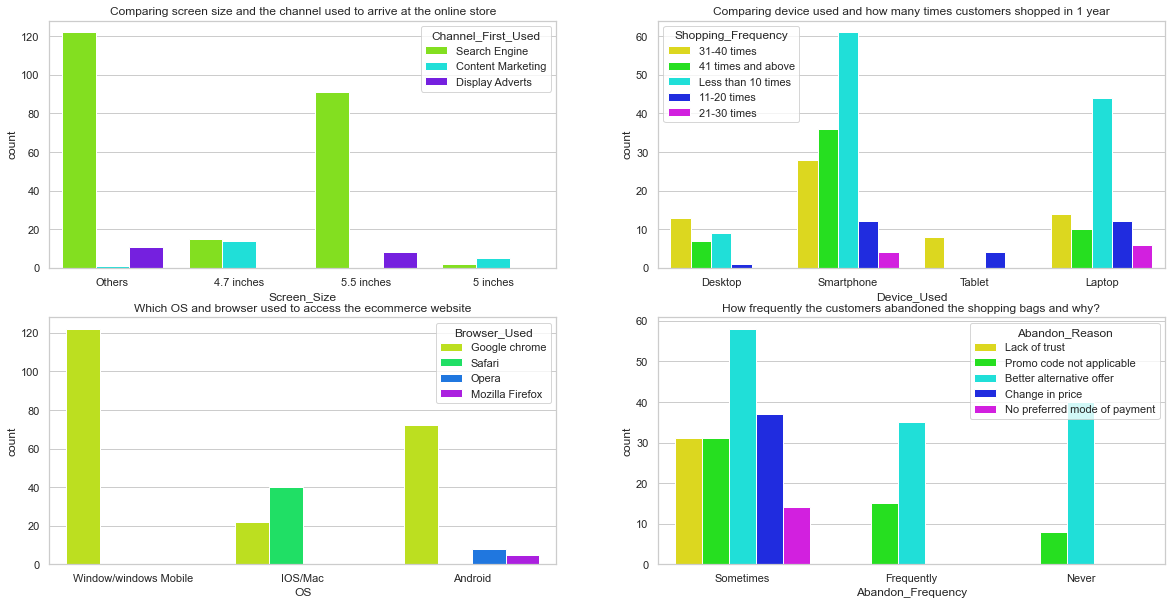

In [23]:
# Comparision between two variables
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.title('Comparing screen size and the channel used to arrive at the online store',fontsize=12)
sns.countplot(CR['Screen_Size'],hue=CR['Channel_First_Used'],palette="hsv");

plt.subplot(2,2,2)
plt.title('Comparing device used and how many times customers shopped in 1 year',fontsize=12)
sns.countplot(CR['Device_Used'],hue=CR['Shopping_Frequency'],palette="hsv");

plt.subplot(2,2,3)
plt.title('Which OS and browser used to access the ecommerce website',fontsize=12)
sns.countplot(CR['OS'],hue=CR['Browser_Used'],palette="hsv");

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags and why?',fontsize=12)
sns.countplot(CR['Abandon_Frequency'],hue=CR['Abandon_Reason'],palette="hsv");

plt.subplot(2,2,2).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="Abandon_Reason");
plt.show()

**Observations:**

<font color='red'>The customers having their mobile screen size say 6 inches(others) have followed search engine channel to arrive at their favorite online store for the first time. Also the customers who have their screen size 5.5 inches also used search engine channel to access the online shopping store.</font>

<font color='red'>Most of the customers used Smartphones 31-40 times in an year to access the ecommerce websites to shop the products.
Many customers having windows operating system in their device ran Google chrome to access the ecommerce shopping websites and some of the customers having IOS/Mac operating system used Google chrome as well as Safari to reach the online shopping store.</font>

<font color='red'>Due to Lack of trust on the ecommerce websites, sometimes most of the customers abandoned the websites and some of the customers abandoned the shopping website due to the promo code not applicable. which means, if the product is having the special price or some catalogue price rule is applicable on it.Then coupon code should not be applicable on the products.</font>

<font color='red'>So it is important for the ecommerce companies to create discount price, offers, coupon codes to retain the customers.</font>

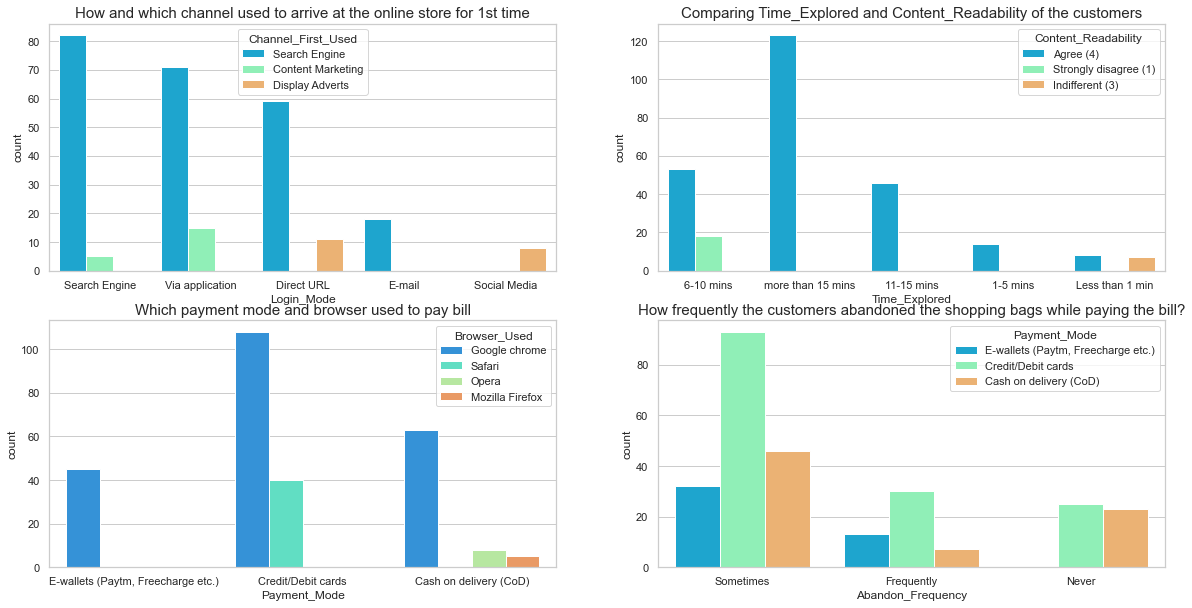

In [24]:
# Comparision between two variables
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.title('How and which channel used to arrive at the online store for 1st time',fontsize=15)
sns.countplot('Login_Mode',hue='Channel_First_Used',palette="rainbow",data=CR);

plt.subplot(2,2,2)
plt.title('Comparing Time_Explored and Content_Readability of the customers',fontsize=15)
sns.countplot('Time_Explored',hue='Content_Readability',palette="rainbow",data=CR);

plt.subplot(2,2,3)
plt.title('Which payment mode and browser used to pay bill',fontsize=15)
sns.countplot('Payment_Mode',hue='Browser_Used',palette="rainbow",data=CR);

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags while paying the bill?',fontsize=15)
sns.countplot('Abandon_Frequency',hue='Payment_Mode',palette="rainbow",data=CR);

plt.show()

**Observations:**

<font color='red'>Search engine is the most used channel by the customers to arrive their favourite store for the first time and after visit the website for the first time, most of them used the same channel to reach the online retail store to reshopping the products.</font>

<font color='red'>Most of the customers agreed that the content on the website is easy to read and understand also they explored more than 15 mins before making the purchase decision and some of the customers strongly disagreed that the content is not good and they explored 6-10 mins before making the purchase decision. So ecommerce websites should enable some images and it should contain clear structure, so that the customers can easily read and understand the content of the product.</font>

<font color='red'>Most of the customers used google chrome to reach the websites and they preferred to pay their product price using Credit/Debit cards and only few of the customers used Safari browser to reach the e-retail websites.</font>

<font color='red'>Sometimes the customers used to abandon their selected items and wants to leave without making payment and most of them making the payment using E-wallets methods.</font>

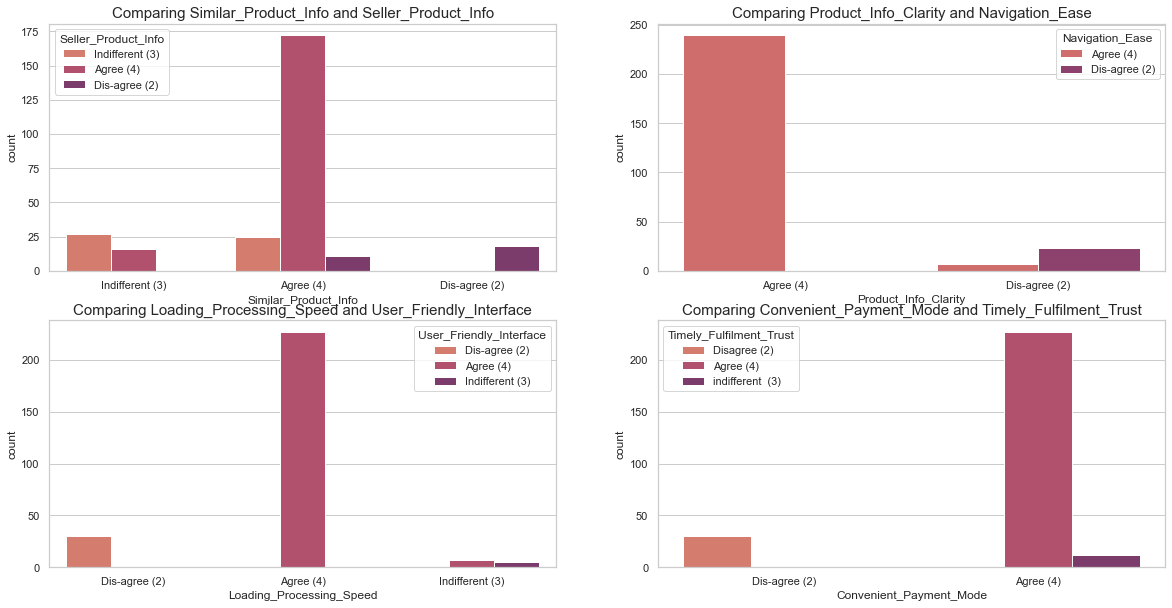

In [25]:
# Comparision between two variables
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.title('Comparing Similar_Product_Info and Seller_Product_Info',fontsize=15)
sns.countplot(CR['Similar_Product_Info'],hue=CR['Seller_Product_Info'],palette="flare");

plt.subplot(2,2,2)
plt.title('Comparing Product_Info_Clarity and Navigation_Ease',fontsize=15)
sns.countplot(CR['Product_Info_Clarity'],hue=CR['Navigation_Ease'],palette="flare");

plt.subplot(2,2,3)
plt.title('Comparing Loading_Processing_Speed and User_Friendly_Interface',fontsize=15)
sns.countplot(CR['Loading_Processing_Speed'],hue=CR['User_Friendly_Interface'],palette="flare");

plt.subplot(2,2,4)
plt.title('Comparing Convenient_Payment_Mode and Timely_Fulfilment_Trust',fontsize=15)
sns.countplot(CR['Convenient_Payment_Mode'],hue=CR['Timely_Fulfilment_Trust'],palette="flare");

plt.subplot(2,2,4).legend(loc ="upper left",title="Timely_Fulfilment_Trust");
plt.show()

**Observations:**

<font color='red'>Most of the customers agreed that the information on similar product to the one highlighted is important for product comparison and also Complete information on listed seller and product being offered is important for purchase decision. In order to buy a product, the ecommerce website must give the complete information about the product and seller information then only the customers can compare the product costs and its details in different websites and they tend to buy that particular product in a particular website.</font>

<font color='red'>Around 90% of the customers agreed that they should be able to navigate the website easily and the products information in the website must be clearly stated their uses, lifetime, benefits etc.Then only more customers tend to buy those products and can shop easily.</font>

<font color='red'>Most of the customers agreed with the user friendly interface of the websites which can be easily loaded and processed also these websites' loading and processing capacity is very fast so that the customers like to shop in ecommerce websites. If these websites do not have this much of loading and processing speed then customers don't want to buy the products in this website and they tend to other websites or other options rather than this.</font>

<font color='red'>Most of the customers agree to the trust that the online retail stores will fulfil its part of the transaction at the stipulated time also most of them are very happy with the convenient payment modes given by the websites. </font>

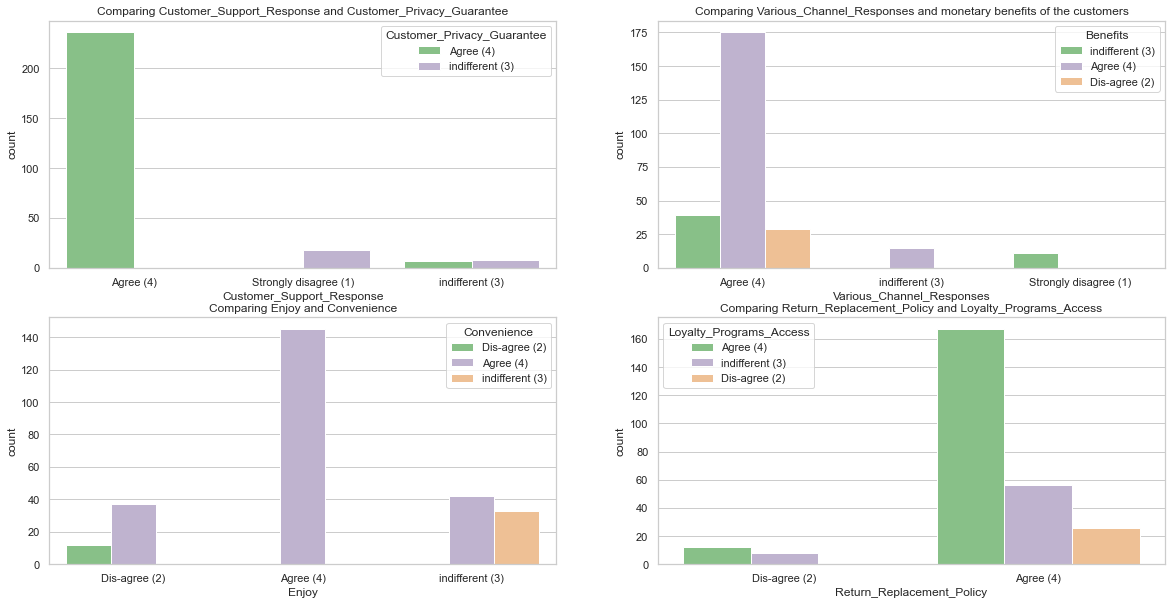

In [26]:
# Comparision between two variables
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.title('Comparing Customer_Support_Response and Customer_Privacy_Guarantee',fontsize=12)
sns.countplot(CR['Customer_Support_Response'],hue=CR['Customer_Privacy_Guarantee'],palette="Accent");

plt.subplot(2,2,2)
plt.title('Comparing Various_Channel_Responses and monetary benefits of the customers',fontsize=12)
sns.countplot(CR['Various_Channel_Responses'],hue=CR['Benefits'],palette="Accent");

plt.subplot(2,2,3)
plt.title('Comparing Enjoy and Convenience',fontsize=12)
sns.countplot(CR['Enjoy'],hue=CR['Convenience'],palette="Accent");

plt.subplot(2,2,4)
plt.title('Comparing Return_Replacement_Policy and Loyalty_Programs_Access',fontsize=12)
sns.countplot(CR['Return_Replacement_Policy'],hue=CR['Loyalty_Programs_Access'],palette="Accent");

plt.subplot(2,2,2).legend(loc ="upper right",title="Benefits");
plt.subplot(2,2,4).legend(loc ="upper left",title="Loyalty_Programs_Access");

plt.show()

**Observations:**

<font color='red'>Almost all the customers agreed that ecommerce websites have empathy towards the customers and these sites being able to guarantee the privacy of the customers. The online retailers should be able to resolve all the queries of the customers and they have to assure that the customers credentials are secured and confidential. If the websites guarantees the privacy, it is seen that the customers feel safe to shop onlone and likely to shop more, which will enhance the companies sales.</font>

<font color='red'>Most of the customers agreed that the online shopping gives monetary benefits and responsiveness, availability of several communication channels will help them more while shopping online which means if one channel is not available then customers can easily reach out to other channel to fulfil their benefits. So, it is important for the online e-tailer companies to provide various channels to communicate with the customers. The ecommerce websites should ask the feedback regarding their services, ratings of the products, reviews etc and also they try to communicate with the customers in different social platform then only customers get satisfied by the e-tailers sites and make more shopping on the particular websites regularly which intends to increase the sales of the company. If one website gives less price and more discount for particular product then the customers tend to shop more in that particular website. So, the companies must try to give less price then customers like their offers and retention also increases.</font>

<font color='red'>Most of the customers believed that they enjoy online shopping also shopping online is convenient and flexible and some of the customers who disagreed with the enjoyment of the shopping, they are not convenient with the online shopping. Some customers shops online for their enjoyment purpose they are termed to be hedonistic, for them shopping online gives experiential satisfaction. They contribute much for the ecommerce companies by buying all the costly products randomly.</font>
    
<font color='red'>Most of the customers agreed that return and replacement policy of the e-tailer is important for purchase decision also gaining access to loyalty programs is a benefit of shopping online. Many return policies have conditional agreements, such as time limits, that must be clearly defined and expressed at the time of purchase or else the customers won't get the chance to return their damaged or dissatisfied products due to this they may not access the same website if they want to shop again. It is evident from the fact that the customers actually not liking the products completely, they are just purchasing the products and returning them in case of any dissatisfaction. So it is important for the online shopping websites to make easy return and replacement policy if they want to retain their customers. Also, by gaining access to loyalty programs, the customers get more and more rewards, increasing their engagement rate and thus bringing more profit to both company and customer.</font>

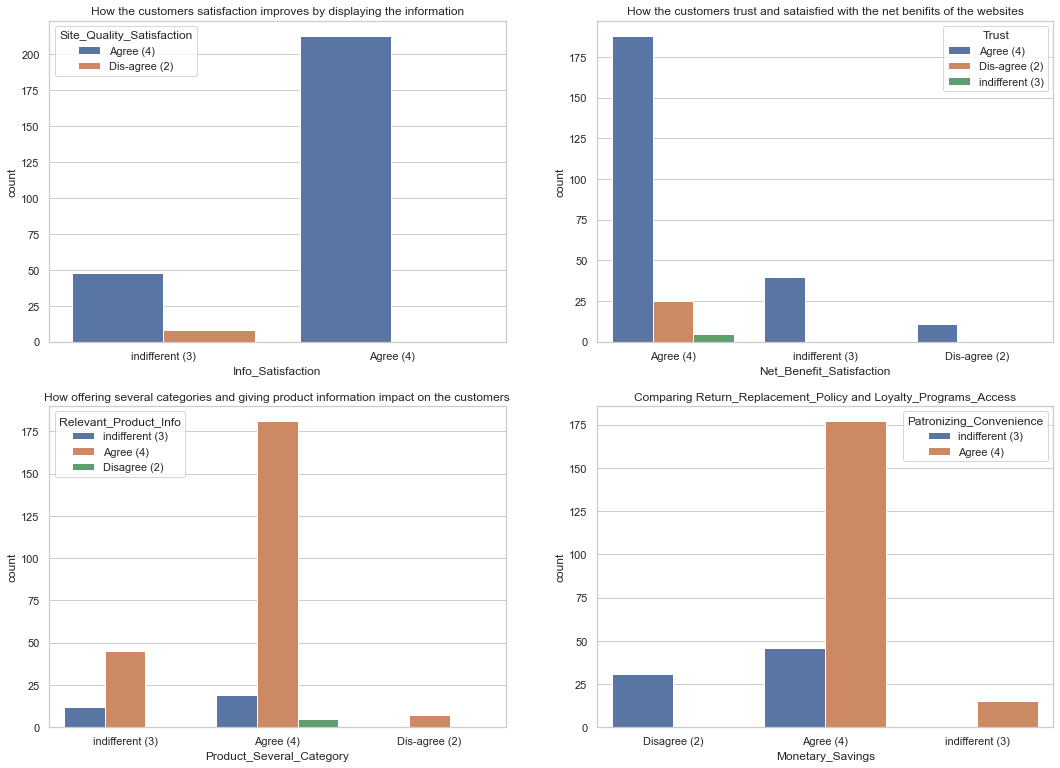

In [27]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('How the customers satisfaction improves by displaying the information',fontsize=12)
sns.countplot(CR['Info_Satisfaction'],hue=CR['Site_Quality_Satisfaction'],palette="deep");

plt.subplot(2,2,2)
plt.title('How the customers trust and sataisfied with the net benifits of the websites',fontsize=12)
sns.countplot(CR['Net_Benefit_Satisfaction'],hue=CR['Trust'],palette="deep");

plt.subplot(2,2,3)
plt.title('How offering several categories and giving product information impact on the customers',fontsize=12)
sns.countplot(CR['Product_Several_Category'],hue=CR['Relevant_Product_Info'],palette="deep");

plt.subplot(2,2,4)
plt.title('Comparing Return_Replacement_Policy and Loyalty_Programs_Access',fontsize=12)
sns.countplot(CR['Monetary_Savings'],hue=CR['Patronizing_Convenience'],palette="deep");

plt.subplot(2,2,2).legend(loc ="upper right",title="Trust");
plt.show()

**Observations:**

<font color='red'>Many customers agreed that displaying quality information on the website improves satisfaction of customers since they believe that displaying quality information have significant association with customer satisfaction and they are satisfied and happy while shopping on good quality websites. In order to obtain high levels of customer satisfaction, high service quality is needed, which often leads to favourable behavioural intentions also a website with good system quality, information quality, and electronic service quality is a key to success in e-commerce. So, the online e-tailers must display all the information about the product then only customers get an idea to buy the products regularly.</font>

<font color='red'>Most of the customers agreed that net Benefit derived from shopping online can lead to users’ satisfaction also they believe that user satisfaction cannot exist without trust. The e-tailer should provide crediting points (net benefits) so that the customers tend to buy frequently in order to gain points. Trust is also a major factor for customers to decide whether to buy products from online stores or not also trust helps reduce uncertainty when the degree of familiarity between the customer and transaction security mechanism is insufficient. If customers have a high level of trust toward the website, it is more likely for them to have intention to purchase so it’s important for the ecommerce website to make the customers get trust on them.</font>

<font color='red'>The customers are more likely to purchase on the same websites if that website offers them a wide variety of products in several category and giving relevant information about the products. Having multiple product lines may allow to grow the ecommerce business and finding accurate and up-to-date information of the product must be stated clearly in the website so that the customers can buy the products without any confusion.</font>

<font color='red'>In this digital and competitive world, everyone wants to save money, the ecommerce company need to know that the best way to sell online is to make the consumer feel that he is saving money doing so. And not just feel, online shopping should result in a lot of saving for the consumer. This saving would automatically get converted into trust and brand equity for the seller. To do this the online companies should offer the best deals and bargains to the consumer through social platforms. If the retailers give some discounted prices then the customers can make money savings and they tend to purchase in the same websites regularly. Convenience is the important thing for ecommerce and most of the customers agreed with it.</font>

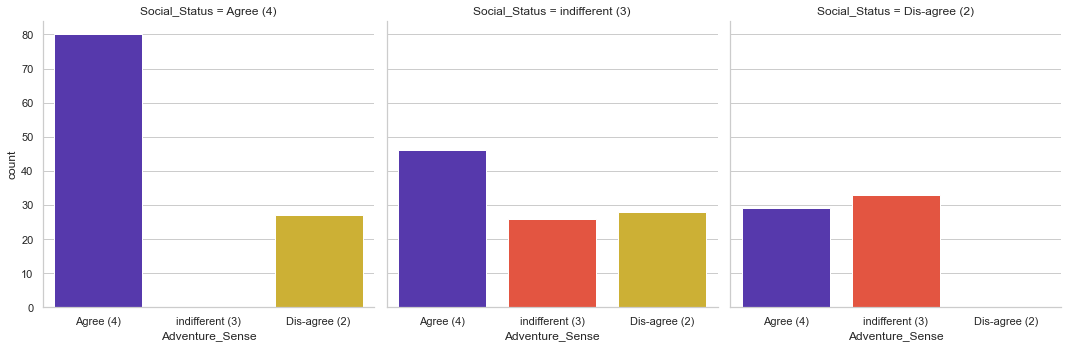

In [28]:
# Comparing how the shopping on e-tailer gives sense of adventure and enhances the social status of the customers
sns.factorplot(x='Adventure_Sense',col='Social_Status',data=CR,palette="CMRmap",kind="count")
plt.show()

<font color='red'>Most of the customers agreed that shopping on the website gives the sense of adventure. The adventures in the shopping websites gives positive activity to experience an amplified enjoyment to the customers while shopping on websites. They also believe that shopping on preferred e-tailer enhances the social status of the customers. Many customers think they are adventuring while shopping online as they search for low cost and high discount products to buy and prefer the same to the others. In this way they think that shopping in the website gives them the adventure.</font>

<font color='red'>Shopping online won't affect anyone's status and the customers agreed that shopping on preferred e-tailer enhances their social status.</font>

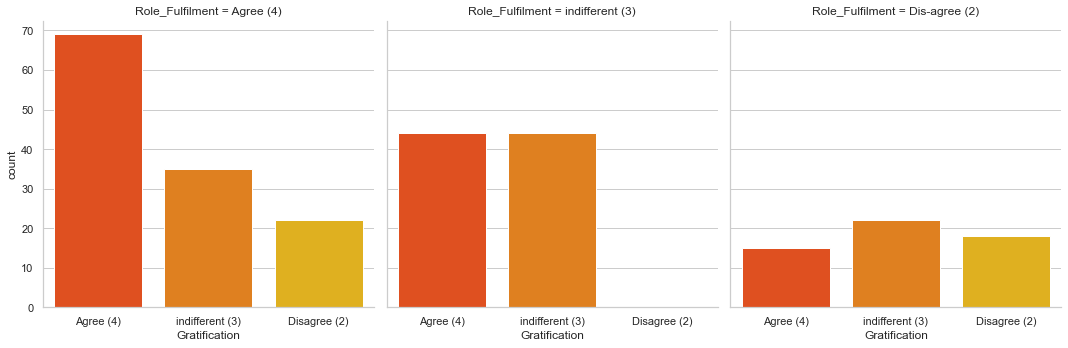

In [29]:
# Comparing how the shopping on favorite e-tailer makes customer feel gratification and helps them fulfill their certain role
sns.factorplot(x='Gratification',col='Role_Fulfilment',data=CR,palette="autumn",kind="count")
plt.show()

<font color='red'>Most of the customers agreed that they felt gratified while shopping on their favourite e-tailer. This is because the e-tailer companies can successfully make up for a mistake or a dissatisfied customer is to be equally expedient in addressing the customer’s needs.</font>

<font color='red'>Also, most of the customers agreed that shopping on online website helps them fulfill their certain roles. Fulfillment refers to activities that ensure customers receive what they ordered, including the time of delivery, order accuracy, and delivery condition, also the customers cannot see the product directly before they purchase it. Companies must ensure delivery timeliness, order accuracy, and delivery conditions to provide superior service quality for customers. The companies must understand that the customer satisfaction is an indication of the customer's belief of the probability of a service leading to a positive feeling. If the companies give positive vibration to the customers by giving chance to fulfill their roles then they shop more on that particular website.</font>

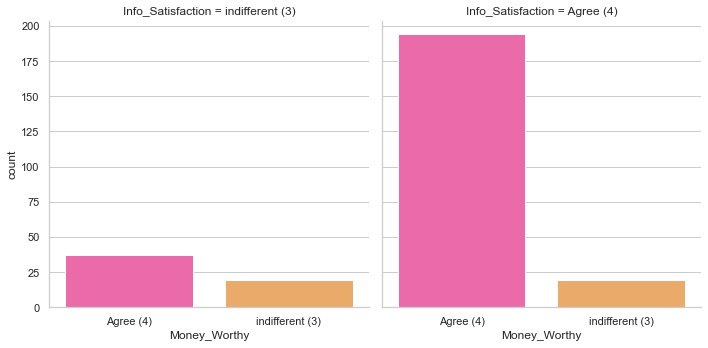

In [30]:
# Checking whether the customers getting value for money spent while shopping online after getting information about the product
sns.factorplot(x='Money_Worthy',col='Info_Satisfaction',data=CR,palette="spring",kind="count")
plt.show()

<font color='red'>The customers should satisfy with their product that they shopped from the online store then only they agreed that they got value for the money they spent. The companies should display the quality information about the products so that the customers being able to purchase their product and thinks that it worth for money and this comes under utilitarian value.</font>

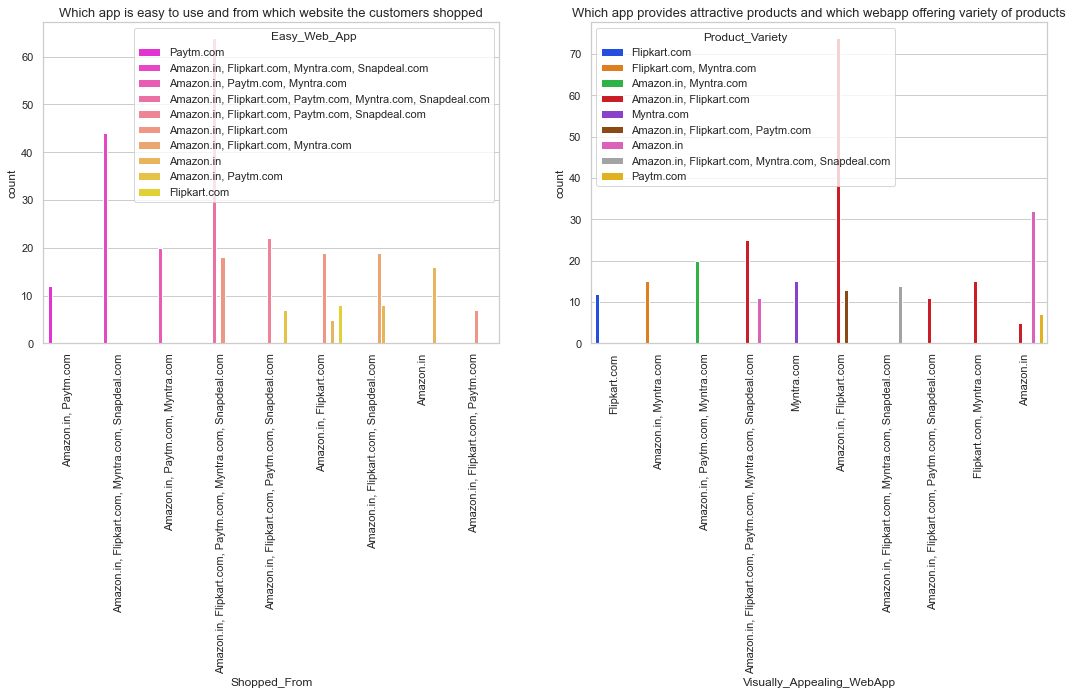

In [31]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Which app is easy to use and from which website the customers shopped',fontsize=13)
sns.countplot(x='Shopped_From',hue='Easy_Web_App',palette="spring",data=CR);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Which app provides attractive products and which webapp offering variety of products',fontsize=13)
sns.countplot(x='Visually_Appealing_WebApp',hue='Product_Variety',palette="bright",data=CR);
plt.xticks(rotation=90)

plt.subplot(2,2,1).legend(loc='upper right',title="Easy_Web_App");
plt.subplot(2,2,2).legend(loc ="upper left",title="Product_Variety");
plt.show()

**Observations:**

<font color='red'>There are many websites for selling the products among them Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are easy to use and shop. Most of the customers used these websites more, this is because, these websites may provide less price products, good discounts and may have lots of varieties of similar products with different brand.</font>

<font color='red'>Amazon and Flipkart have high visual appealing web-page layout compared to others that means these websites provides some colourful graphics on the homepage. The more people find the website attractive, there are higher chances that they will stay a little longer in that website, also these websites provide wild variety of products in an attractive manner which makes the customers to buy the product.</font>

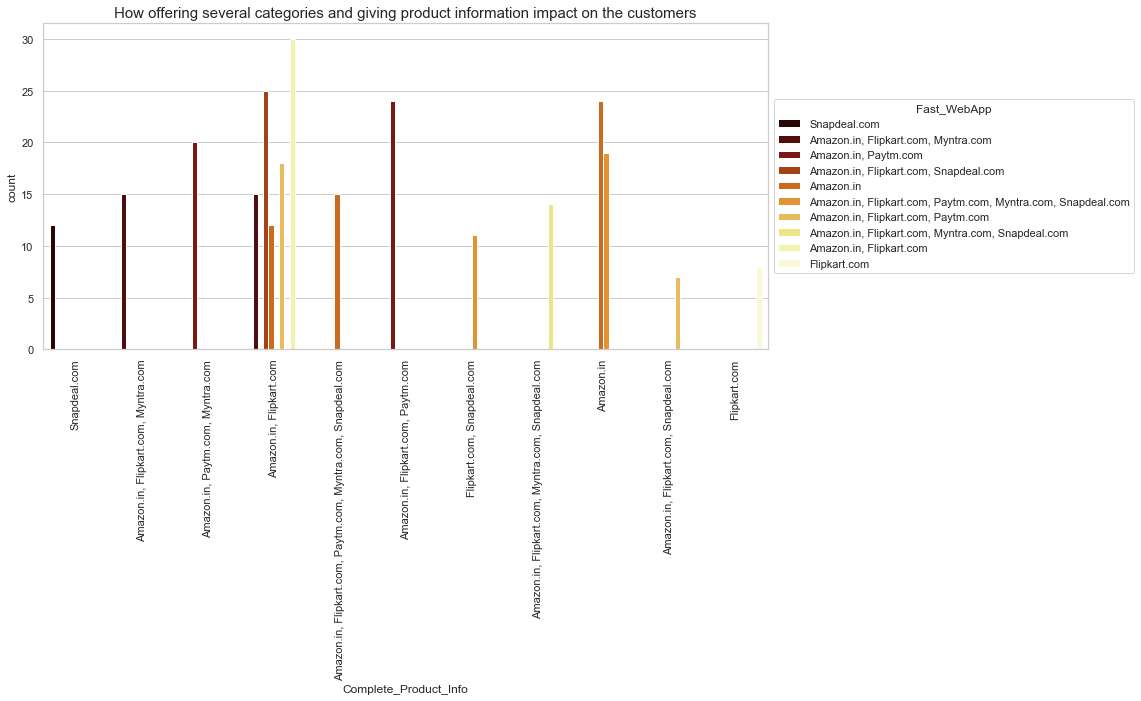

In [32]:
plt.figure(figsize=(13,6))
plt.title('How offering several categories and giving product information impact on the customers',fontsize=15)
sns.countplot(x='Complete_Product_Info',hue='Fast_WebApp',palette="afmhot",data=CR);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Fast_WebApp")
plt.show()

<font color='red'>The most common problem which is faced by the customers is server problem, in many websites these problems are common. Also, only few websites provide the relevant information about the products. These things may lead the customers to have bad impression on these websites.</font>

<font color='red'>From the plot we can visualize that the amazon and flip kart websites gives complete and relevant information and these websites have no issue with the server and most of the customer liked the web speed of both amazon and flip kart.</font>

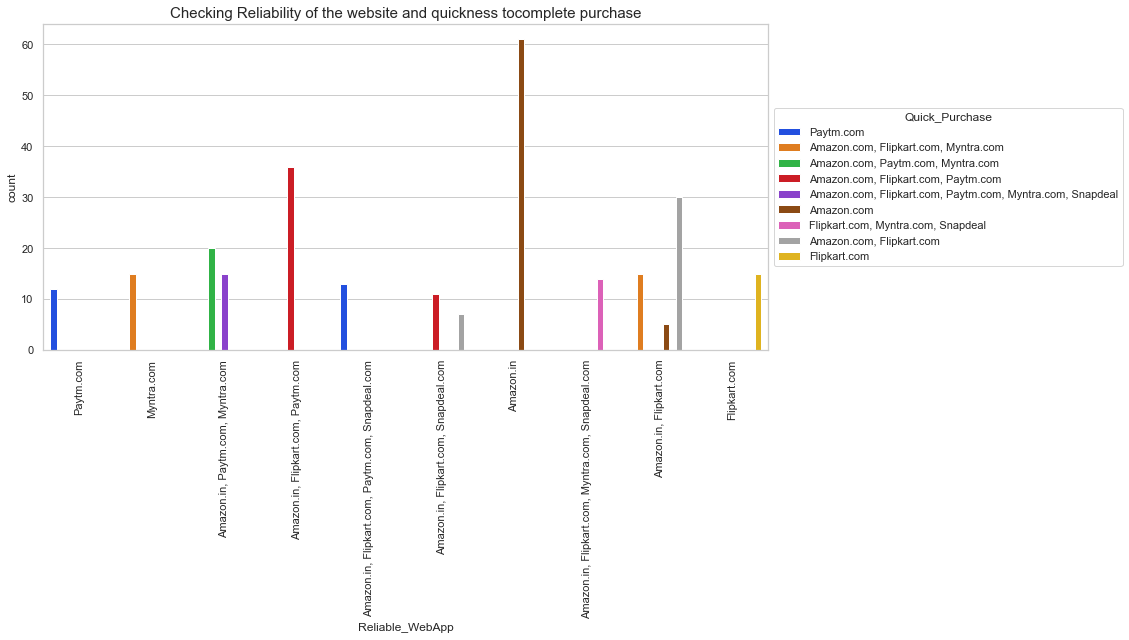

In [33]:
# Checking Reliability of the website and quickness to complete purchase
plt.figure(figsize=(13,6))
plt.title('Checking Reliability of the website and quickness tocomplete purchase',fontsize=15)
sns.countplot(x='Reliable_WebApp',hue='Quick_Purchase',palette="bright",data=CR);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Quick_Purchase")
plt.show()

<font color='red'>The consumer determines the shop’s reliability based on the information transmitted by the shop and certain sites offer customers the opportunity to purchase items that are used which means they are likely to be the most reliable. Some of the customers completes their purchase very quickly due to the discount, less price, free delivery charges etc provided by the ecommerce websites.</font>

<font color='red'>From the plot we can notice amazon site is more reliable and most of the customers complete their purchase on amazon very quickly.</font>

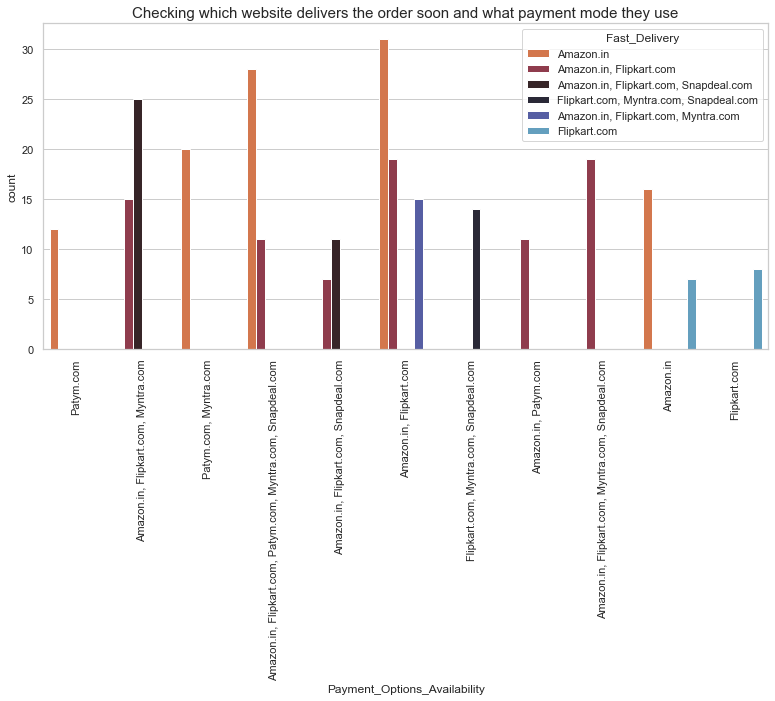

In [34]:
# Checking which website delivers the order soon and what payment mode they use
plt.figure(figsize=(13,6))
plt.title('Checking which website delivers the order soon and what payment mode they use',fontsize=15)
sns.countplot(x='Payment_Options_Availability',hue='Fast_Delivery',palette="icefire_r",data=CR);
plt.xticks(rotation=90)
plt.legend(loc ="upper right",title="Fast_Delivery")
plt.show()

<font color='red'>Having different types of payment methods will helps the customers to pay the invoice easily using their choice of payment and if the websites have speedy delivery methods without delivery charge, then the customers like to buy the products in those websites.</font>

<font color='red'>Here amazon and flipkart have several payment options and amazon indeed has speedy order delivery compared to other websites.</font>

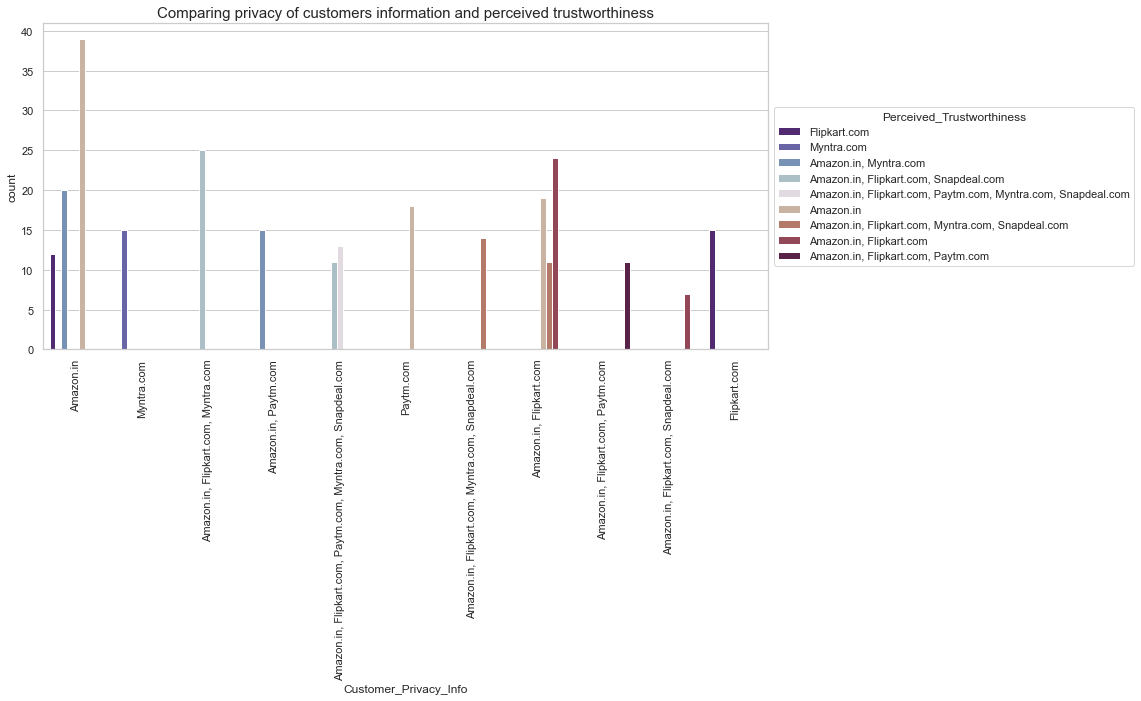

In [35]:
# Comparing privacy of customers information and perceived trustworthiness
plt.figure(figsize=(13,6))
plt.title('Comparing privacy of customers information and perceived trustworthiness',fontsize=15)
sns.countplot(x='Customer_Privacy_Info',hue='Perceived_Trustworthiness',palette="twilight_shifted",data=CR);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Perceived_Trustworthiness")
plt.show()

<font color='red'>Security/privacy refers to the security of credit card payments and privacy of shared information like name of the customer, address and phone number. Customers are always concerned whether the website would protect them against fraud after a transaction. So, website security and privacy are important to assess the service quality of online stores. The customers think that buying online means taking risk, in this case trust is more important thing for both merchant and customer.</font>

<font color='red'>Most of the customers trusts amazon followed by flipkart in terms of keeping their privacy of data information secured and the customers who believes that amazon website keeps their financial information as secrete also trusts flip kart, Myntra, Snapdeal and Paytm in terms of keeping their financial information secured. Most of the customers believed that Amazon has perceived trustworthiness compared to others. Apart from this, customers believed that flip kart and Myntra also have perceived trustworthiness.</font>

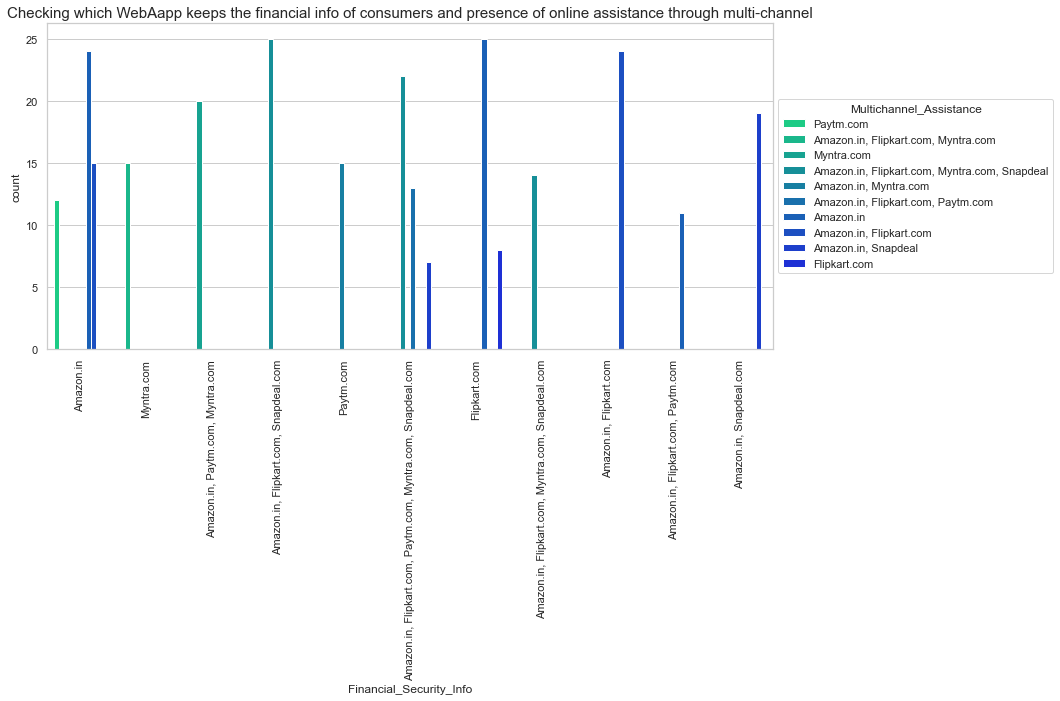

In [36]:
# Comparing privacy of customers information and perceived trustworthiness
plt.figure(figsize=(13,6))
plt.title('Checking which WebAapp keeps the financial info of consumers and presence of online assistance through multi-channel',fontsize=15)
sns.countplot(x='Financial_Security_Info',hue='Multichannel_Assistance',palette="winter_r",data=CR);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Multichannel_Assistance")
plt.show()


<font color='red'>The customers trusts that amazon and flipkart keeps their financial information private and they never share any type of information to others.</font>

<font color='red'>Multi-channel retailing provides several benefits which includes several shoppers like the convenience that is provided through online channels in comparison to physical stores. Most of the customers like Amazon in terms of presence of online assistance through multi-channel.</font>

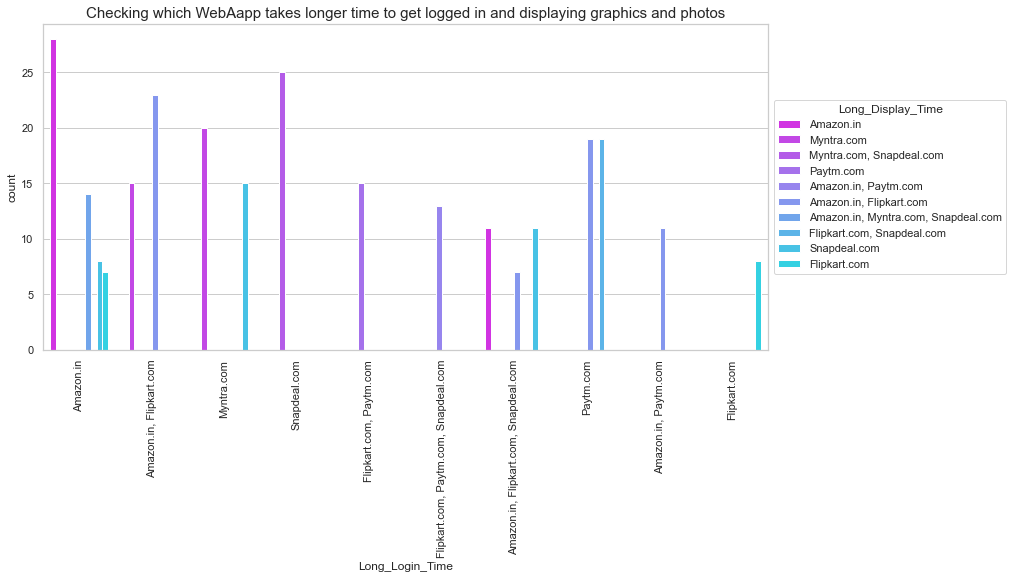

In [37]:
# Comparing Long_Login_Time and Long_Display_Time
plt.figure(figsize=(13,6))
plt.title('Checking which WebAapp takes longer time to get logged in and displaying graphics and photos',fontsize=15)
sns.countplot(x='Long_Login_Time',hue='Long_Display_Time',palette="cool_r",data=CR);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Long_Display_Time")
plt.show()

<font color='red'>The customers mostly choose amazon website for buying products as it gives promotions and sales periods in some days, on these days most of the customers attracted by the offers provided by the websites, wants to buy the products. So, amazon will take more time to allow the customers to get login into the site.</font>

<font color='red'>When there is promotion or sales period, amazon and Myntra takes longer time to display the graphics and photos.</font>

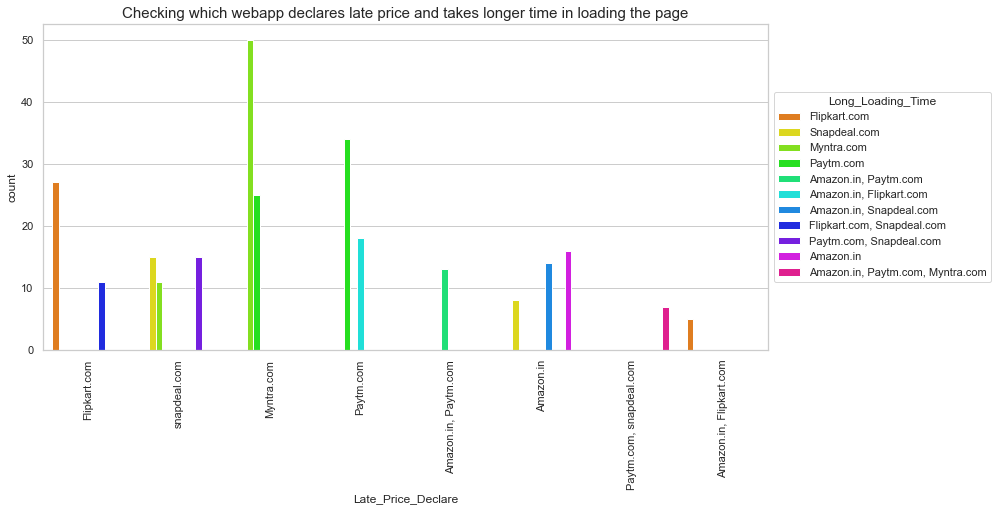

In [38]:
# Comparing Late_Price_Declare and Long_Loading_Time
plt.figure(figsize=(13,6))
plt.title('Checking which webapp declares late price and takes longer time in loading the page',fontsize=15)
sns.countplot(x='Late_Price_Declare',hue='Long_Loading_Time',palette="hsv",data=CR);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Long_Loading_Time")
plt.show()

<font color='red'>When there is promotion and sales, Myntra takes time to load the page and it has late declaration of price in these days.</font>

<font color='red'>Myntra declares the late price in order to clear the sales and they fix the price by comparing with other websites and they end up sales by providing benefits to the customers. At this time most of the customers try to shop on this website so it takes long loading time.</font>

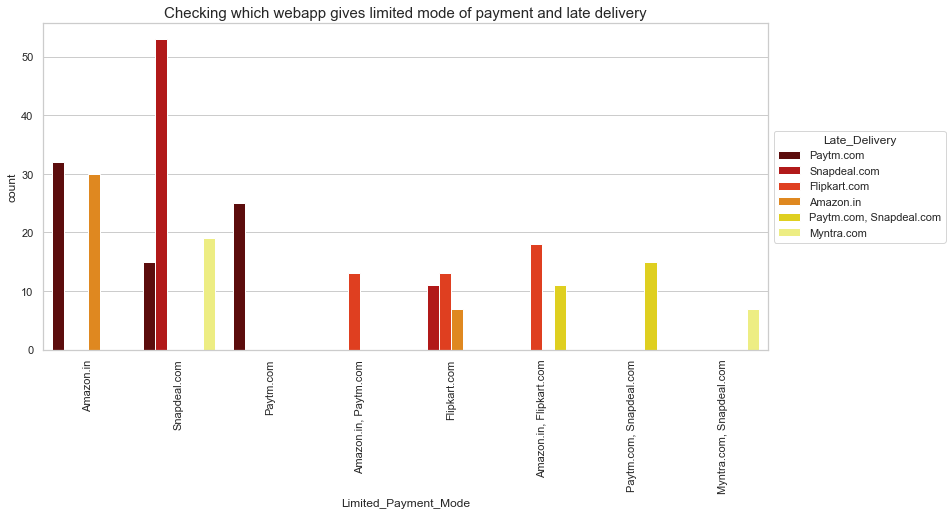

In [39]:
# Comparing Late_Price_Declare and Long_Loading_Time
plt.figure(figsize=(13,6))
plt.title('Checking which webapp gives limited mode of payment and late delivery',fontsize=15)
sns.countplot(x='Limited_Payment_Mode',hue='Late_Delivery',palette="hot",data=CR);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Late_Delivery")
plt.show()

<font color='red'>Snapdeal has limited mode of payment on most of the products followed by Amazon. And paytm takes more time to deliver the product. So this website may not satisfy the customers due to late delivery.</font>

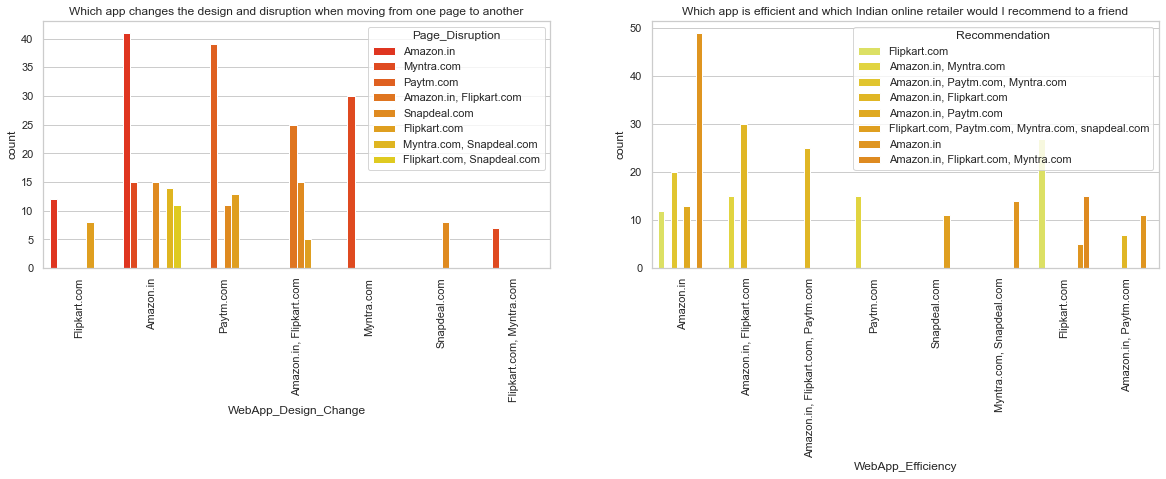

In [40]:
# Comparision between two variables
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.title('Which app changes the design and disruption when moving from one page to another')
sns.countplot(x='WebApp_Design_Change',hue='Page_Disruption',palette="autumn",data=CR);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Which app is efficient and which Indian online retailer would I recommend to a friend')
sns.countplot(x='WebApp_Efficiency',hue='Recommendation',palette="Wistia",data=CR);
plt.xticks(rotation=90)

plt.subplot(2,2,1).legend(loc='upper right',title="Page_Disruption");
plt.subplot(2,2,2).legend(loc ="upper right",title="Recommendation");
plt.show()

<font color='red'>Amazon is the website where they frequently change their application designs in order to attract the customers and satisfies the customers needs and they tend to make customers by updating everyday as per the trend. But the disadvantages of this website are when moving from one page to other it slows down and sometimes it may shutdown.</font>

<font color='red'>Amazon is the website which is more efficient as before and I suggest Amazon.com and Flipkart as a best Indian online retailer store for purchasing all types of products, as they provide enormous amounts of benefits.</font>

<font color='red'>Since we have observed all the columns contains object type data, so we need to convert them into numerical by using appropriate encoding techniques. Here I am using label encoding method to convert the data.</font>

### Taking care of categorical columns using label encoding method

In [41]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in CR.columns:
    if CR[i].dtypes=="object":
        CR[i]=le.fit_transform(CR[i])

In [42]:
# Checking the dataframe after encoding
CR.head()

Gender  Age  Shopping_City  Pincode  Shopping_Since  Shopping_Frequency  \
0       1    1              2   110009               3                   2   
1       0    0              2   110030               3                   3   
2       0    0              4   201308               2                   3   
3       1    0              6   132001               2                   4   
4       0    0              0   530068               1                   0   

   Internet_Accessibility  Device_Used  Screen_Size  OS  ...  Long_Login_Time  \
0                       0            0            3   2  ...                0   
1                       2            2            0   1  ...                1   
2                       1            2            2   0  ...                7   
3                       1            2            2   1  ...                9   
4                       2            2            0   1  ...                5   

   Long_Display_Time  Late_Price_Declare  Long_Loading_Time  \
0                  0                   3                  5   
1                  6                   7                 10   
2                  6                   4                  7   
3                  7                   4                  8   
4                  8                   5                  8   

   Limited_Payment_Mode  Late_Delivery  WebApp_Design_Change  Page_Disruption  \
0                     0              3                     2                0   
1                     7              5                     0                4   
2                     0              3                     5                6   
3                     5              3                     1                1   
4                     7              3                     0                7   

   WebApp_Efficiency  Recommendation  
0                  0               6  
1                  1               3  
2                  0               5  
3                  2               1  
4                  6               3  

[5 rows x 71 columns]

<font color='red'>The categorical columns have been converted into numerical columns by using label encoding.</font>

<font color='red'>Earlier we got one column's statistical summary, after label encoding we are able to notice that all the columns have statistical summary.</font>

<font color='red'>Here the count of all the columns are same which means there are no missing values present in the dataset.Some of the columns have their mean value greater than the median (50%), so we can say they are skewed to right.
In some of the columns, the median is greater than the mean, so the data is skewed to left.
We can also notice the min value, standard deviation and 25% percentile.
In summarising the data, we cna notice huge difference between max and 75% percentile in some of the columns which means there are huge outliers present in those columns. Since all the columns in the dataset are categorical, no need to remove outliers and skewness.</font>

### Identifying the Outliers

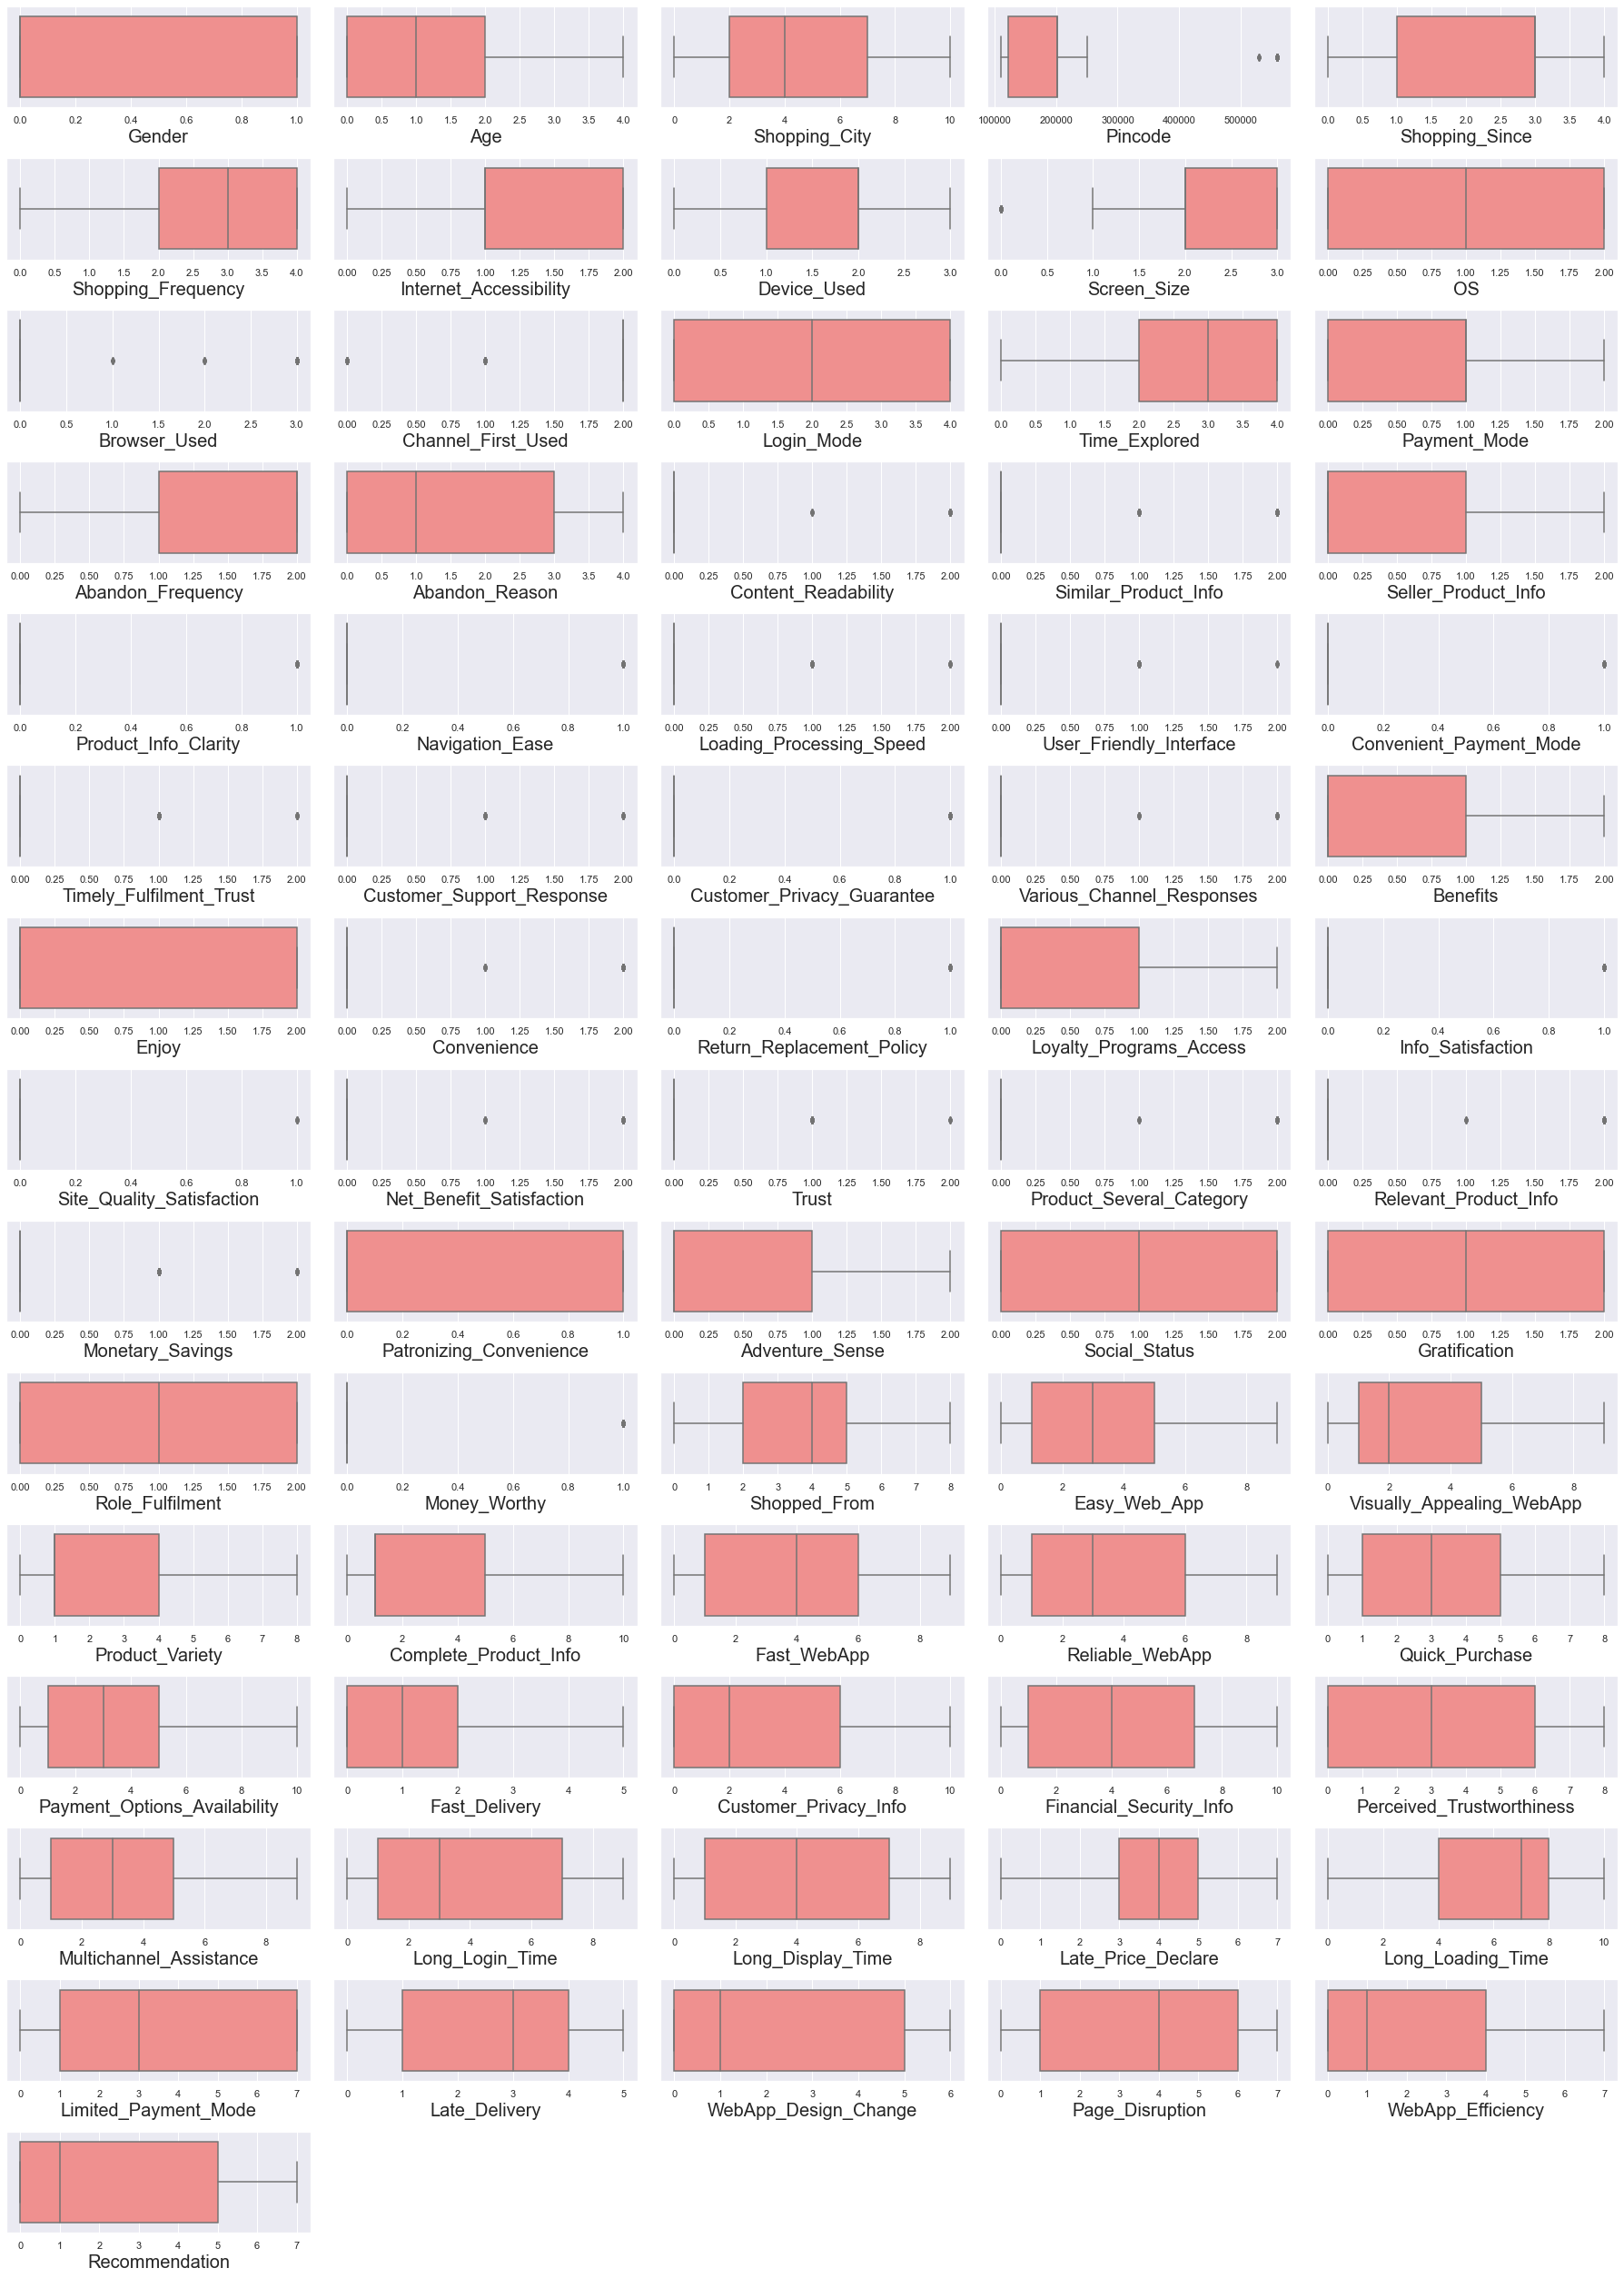

In [43]:
# Let's check the outliers by ploting box plot
sns.set(style="darkgrid")

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in CR:
    if plotnumber<=71:
        ax=plt.subplot(15,5,plotnumber)
        sns.boxplot(CR[column],palette="spring")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Checking Skewness in the data

In [44]:
CR.skew().sort_values()

Channel_First_Used             -2.469485
Screen_Size                    -1.308503
Abandon_Frequency              -0.984016
Shopping_Frequency             -0.848896
Long_Loading_Time              -0.708594
Device_Used                    -0.485180
Time_Explored                  -0.390691
Late_Price_Declare             -0.378929
Shopping_Since                 -0.276968
OS                             -0.270283
Late_Delivery                  -0.147702
Page_Disruption                -0.100608
Limited_Payment_Mode           -0.086712
Login_Mode                     -0.041161
Social_Status                   0.050742
Financial_Security_Info         0.073523
Fast_WebApp                     0.106301
Payment_Mode                    0.129735
Long_Login_Time                 0.131096
Shopped_From                    0.145462
Long_Display_Time               0.167550
Perceived_Trustworthiness       0.199441
Gratification                   0.200646
Role_Fulfilment                 0.280087
Shopping_City   

### Checking Correlation between the independent variables

In [45]:
cor = CR.corr()
cor

Gender       Age  Shopping_City   Pincode  \
Gender                        1.000000  0.046169       0.080912 -0.260365   
Age                           0.046169  1.000000       0.113712 -0.120704   
Shopping_City                 0.080912  0.113712       1.000000 -0.416597   
Pincode                      -0.260365 -0.120704      -0.416597  1.000000   
Shopping_Since               -0.057096 -0.087847      -0.138329 -0.090049   
Shopping_Frequency            0.062103  0.278446       0.170985 -0.287645   
Internet_Accessibility       -0.342762  0.206453       0.057544 -0.101272   
Device_Used                   0.061673  0.022383       0.020650 -0.004980   
Screen_Size                   0.028794 -0.006101       0.199296 -0.211198   
OS                           -0.019243 -0.048087      -0.051642 -0.053901   
Browser_Used                  0.071385 -0.231530      -0.051933  0.089281   
Channel_First_Used           -0.079834  0.186455       0.147015 -0.264197   
Login_Mode                   -0.189867 -0.091771      -0.238503  0.195495   
Time_Explored                -0.042602 -0.218962      -0.232425  0.117338   
Payment_Mode                  0.073649 -0.079731      -0.006495  0.031185   
Abandon_Frequency             0.084746 -0.016126       0.175461 -0.145879   
Abandon_Reason                0.090947  0.172284       0.018034 -0.139742   
Content_Readability           0.044882  0.156598      -0.140482  0.128865   
Similar_Product_Info          0.222746 -0.128210      -0.017881  0.247782   
Seller_Product_Info           0.104183 -0.165633      -0.075794  0.062125   
Product_Info_Clarity          0.130537  0.130677      -0.177541  0.183119   
Navigation_Ease               0.126828  0.038146      -0.231361  0.218968   
Loading_Processing_Speed      0.211456  0.107886      -0.106858  0.120349   
User_Friendly_Interface       0.233286 -0.017370      -0.175474  0.166327   
Convenient_Payment_Mode       0.130537  0.070708      -0.073613  0.048176   
Timely_Fulfilment_Trust       0.116310  0.095292      -0.139594  0.086831   
Customer_Support_Response    -0.042149  0.186515      -0.026981  0.177061   
Customer_Privacy_Guarantee   -0.040372  0.100063      -0.122003  0.223849   
Various_Channel_Responses    -0.168164  0.028440      -0.010172 -0.118592   
Benefits                      0.088451 -0.142415       0.127798 -0.128332   
Enjoy                         0.191201 -0.137459       0.110092 -0.041875   
Convenience                   0.194429 -0.153655       0.105115 -0.174219   
Return_Replacement_Policy     0.134624 -0.067365       0.156375 -0.133557   
Loyalty_Programs_Access       0.061800 -0.155487       0.038344  0.041138   
Info_Satisfaction             0.325530 -0.151325       0.231117 -0.165389   
Site_Quality_Satisfaction     0.017860 -0.086066       0.137869 -0.088566   
Net_Benefit_Satisfaction      0.156177 -0.074552       0.144041 -0.165653   
Trust                         0.174716  0.068319      -0.205812  0.215892   
Product_Several_Category      0.091065 -0.000128       0.204173 -0.052934   
Relevant_Product_Info         0.307567 -0.054375       0.091989 -0.137813   
Monetary_Savings              0.045041 -0.001070       0.163258 -0.146273   
Patronizing_Convenience       0.224563 -0.058997       0.046345 -0.079750   
Adventure_Sense              -0.044539 -0.031707      -0.192296  0.056103   
Social_Status                -0.024489  0.176953      -0.079335  0.114803   
Gratification                -0.148308  0.133552       0.143118 -0.062510   
Role_Fulfilment              -0.041106 -0.230168      -0.124989 -0.058640   
Money_Worthy                  0.217686  0.112260       0.346230 -0.003496   
Shopped_From                  0.091958 -0.015102       0.120865 -0.020076   
Easy_Web_App                  0.083668 -0.013076       0.084923 -0.072228   
Visually_Appealing_WebApp     0.022497 -0.035915      -0.015011  0.015560   
Product_Variety              -0.011826  0.094365      -0.090765  0.141687   
Complete_Product_Info       

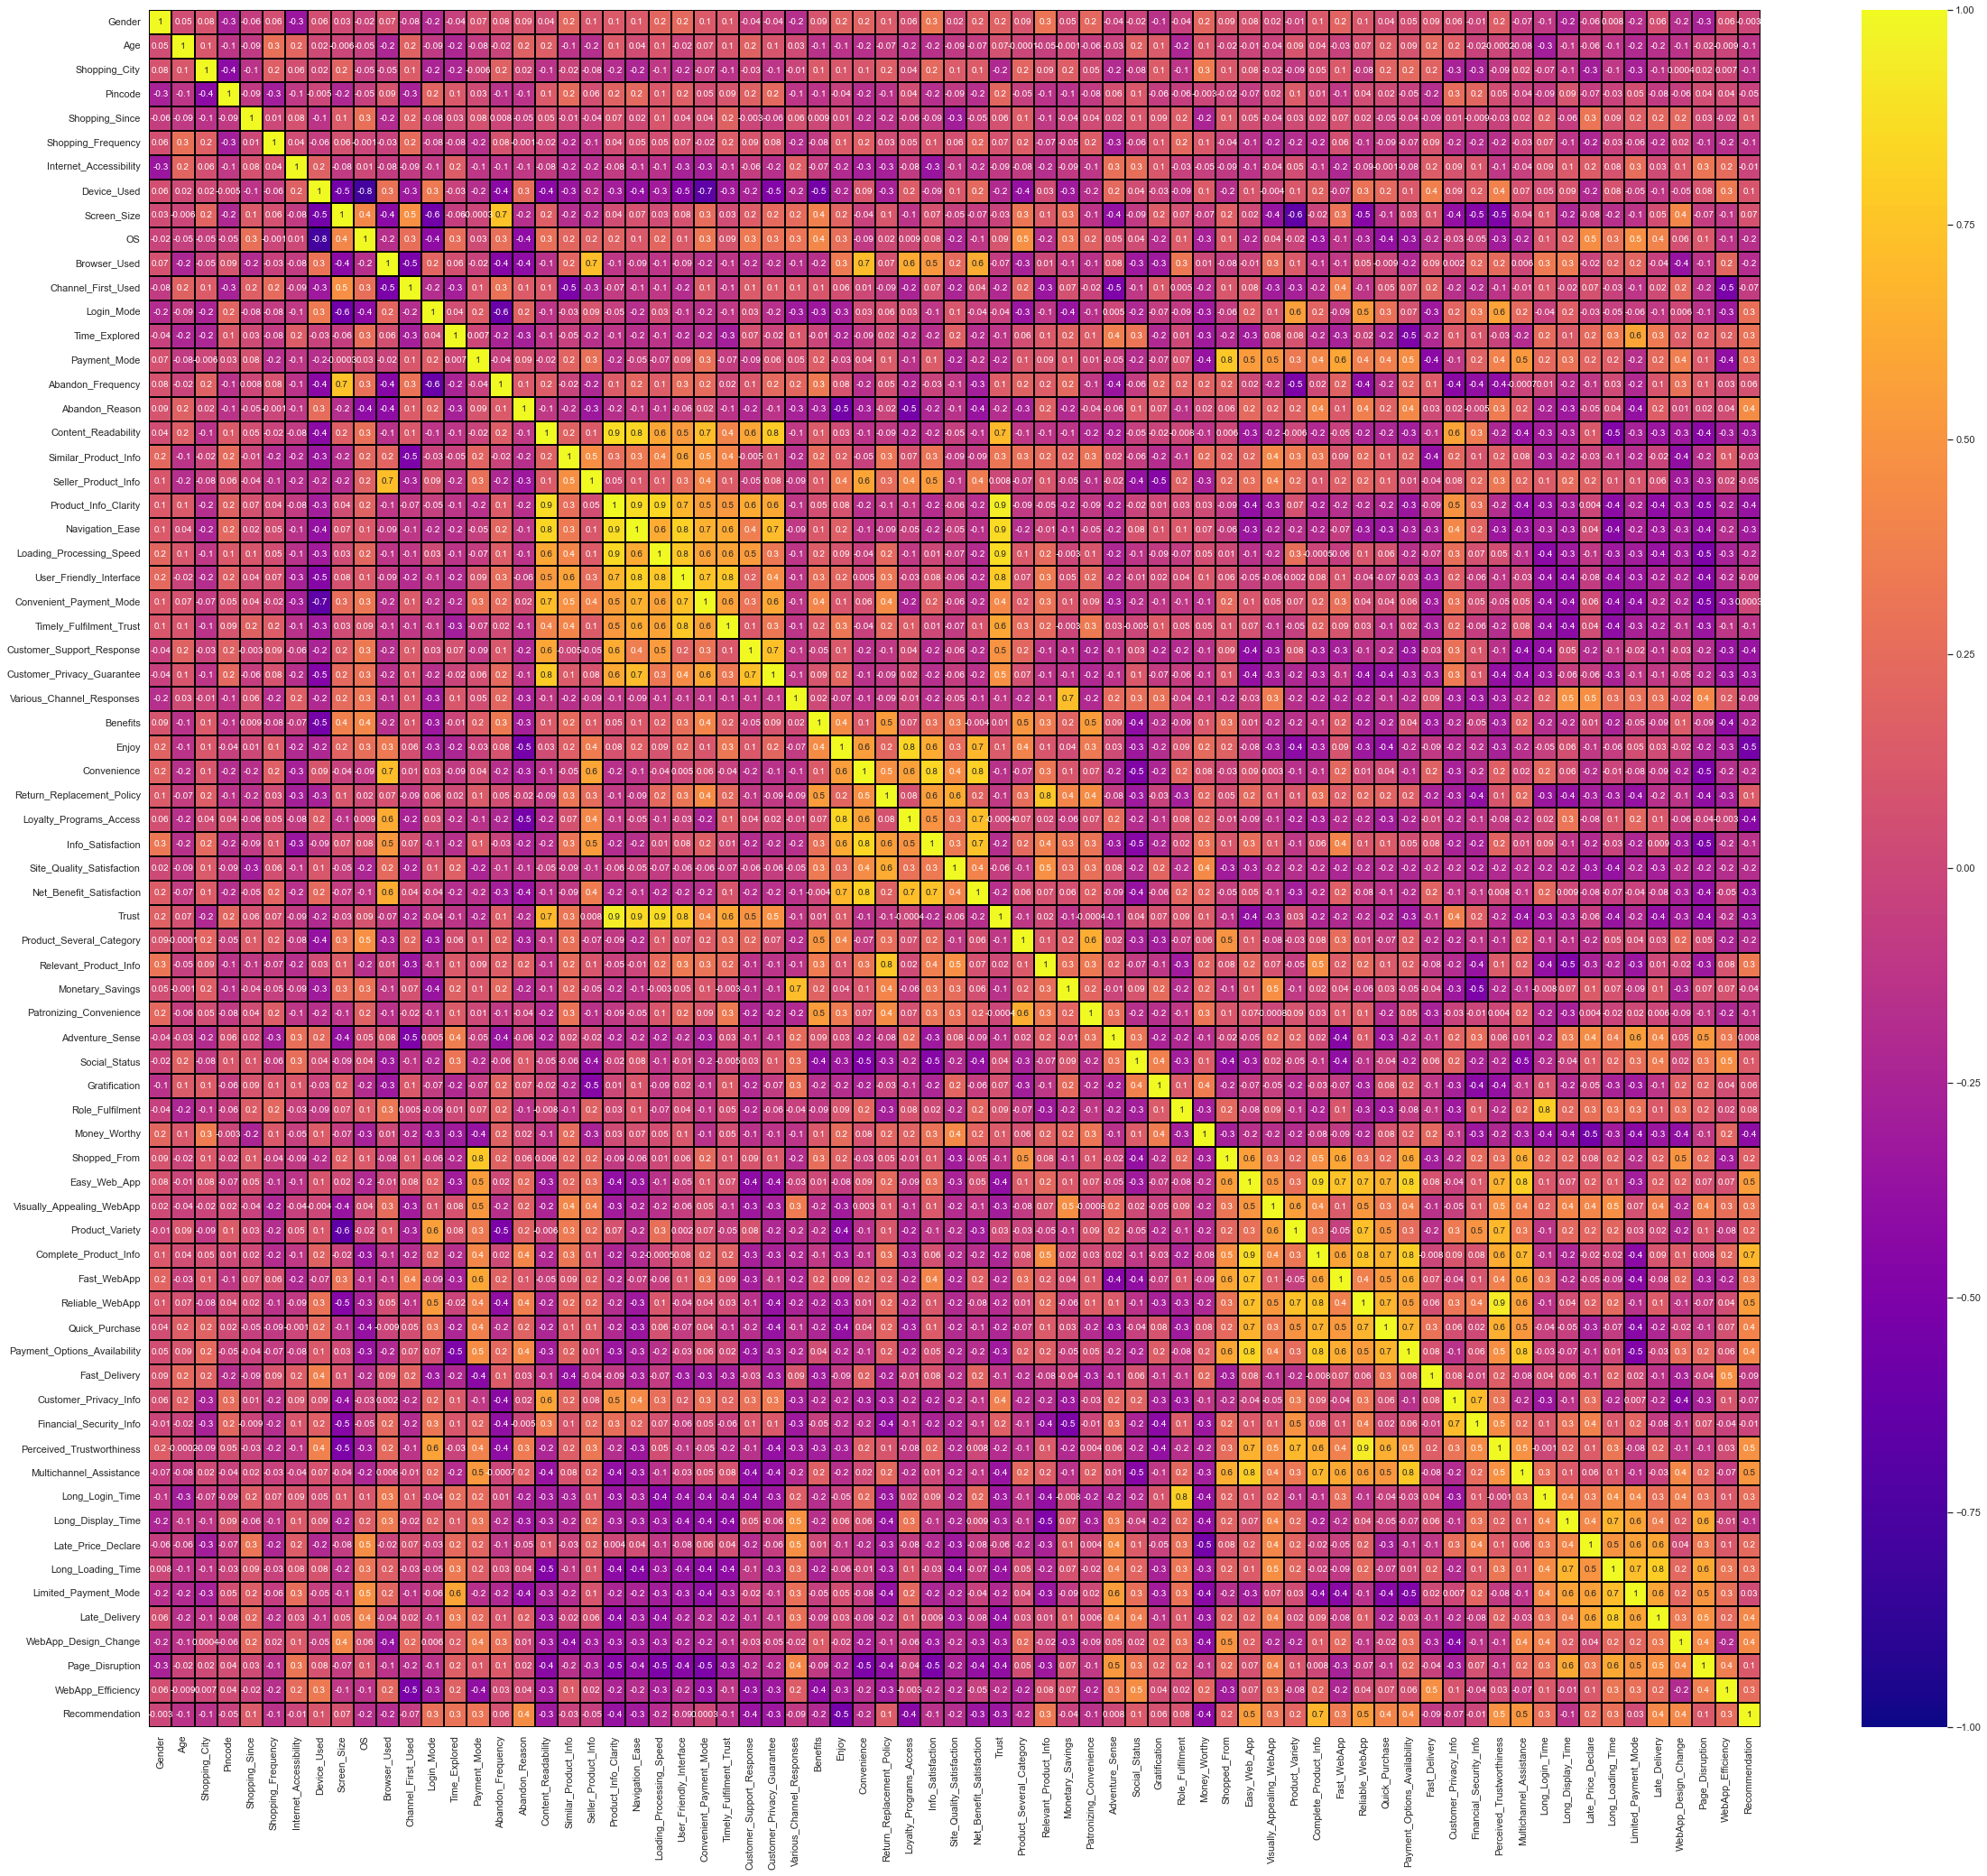

In [46]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(40,35))
sns.heatmap(CR.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="plasma")
plt.yticks(rotation=0);

### Findings of the Data Analysis

<font color='red'>1. In this project we have analyzed ecommerce quality in online businesses and develop new understanding to the most important dimensions of E-retail factor for customer activation and retention.</font>

<font color='red'>2. This project aimed to enhance prior understanding of how ecommerce websites affected customer satisfaction, customer trust, and customer behaviour, i.e., repurchase intention, customer loyalty, and site revisit.</font>

<font color='red'>3. The dimensions like information about the products, convenient payment mode, Trust, Fulfilment, website design change, security/privacy and many others had a positive impact on the ecommerce websites for customers. Also, some of the dimensions like ease of navigation, loading and speed, late delivery etc did not have impact on the ecommerce websites. Thus, a company needs to pay attention to these dimensions more specifically and seek breakthroughs that can improve its performance and e-service quality.</font>

<font color='red'>4. Customer satisfaction and customer trust appeared as the outcomes of overall e-retail factor. The results of the analysis showed that e-retail factor had a positive impact on customer satisfaction. The majority of research done about e-retail factor states that customer satisfaction is the main determinant impacting on e-retail factor. It supports the idea that there is a significant relationship between e-retail factor and customer satisfaction. E-retail factor also had a positive impact on customer trust. The better the e-retail factor of a company, the higher the customer trust. Providing good service quality enhances customer satisfaction and customer trust.</font>

<font color='red'>5. From the above analysis we found that the mains reasons or factors which attract consumers to do shopping online and then main reasons or obstacles which discourage consumers from shopping online. Therefore, from the analysis, it is found that most of the respondents use internet daily but most of the respondents do not use internet daily to buy products. Nearly half of the total respondents' opinions were that they would only use the internet to buy products when the need arises to do so.</font>

### Conclusions:

<font color='red'>The endeavour of this study is to identify the motivating factors towards online shopping and in which e-tailer the customers likely to shop more.</font>

<font color='red'>In this project, I have done some feature engineering by replacing the unwanted entries by suitable columns, found no null values, and renamed the columns by giving new names. Visualized the data using count plot, factor plot, pie plot and distribution plot, also encoded the object data into numerical using label encoding method. Checked the statistical summary of the dataset and checked for skewness, outliers and correlation between the features.</font>

<font color='red'>From the analysis it was found that consumers purchasing decisions were dependent on various factors. All these motives motivate consumers to purchase products through online. According to consumers' opinions, "time saving" is the most important motivating factor for online shopping.</font>

<font color='red'>Again "information availability", "open 24/7", "huge range of products/ brands", "reasonable prices", "various offers for online products", "easy ordering system", and "shopping fun" are other motivating factors for online shopping respectively. Also, "online payment system", "personal privacy or security issues", "delaying of delivery" and "lacks of personal customer service" are the main inhibitions of online shopping to the respondents.</font>

<font color='red'>After visualizing the data, I found Amazon is the best online store where the customers trust on buying products and it has positive impact on the customers. Also, amazon and flipkart have increased customers’ expectations. So, they are the best online retailer who makes the loyal customers and satisfies the customers.</font>

<font color='red'>It was also observed that online shopping is not trustworthy and reliable to some consumers due to only online payment system and personal privacy. In addition, online security is a major concern for the consumer particularly in terms of fraud, privacy and hacking. So, the organizers should make up their organization for better sales.</font>